# Исследование компьютерных игр

## 1 Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt
from pylab import rcParams
from scipy import stats as st

In [2]:
# настройки для графиков
rcParams['figure.figsize'] = 7, 5

%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-pastel')
sns.set_style('darkgrid')

In [3]:
# открытие файла
data = pd.read_csv('E:\My documents\Studying\Data_Analyst\Projects\pr_5_games\games.csv', sep=',')

In [4]:
# вывод первых 10 строк датафрейма
pd.set_option('display.max_columns', None)
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# вывод основной информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# подсчет строк-дубликатов
data.duplicated().sum()

0

In [7]:
# подсчет количества пропусков в каждом из столбцов
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
# сохранение первоначального количества строк в переменной
old_data = data.shape[0]

На основании полученной информации можно сделать следующие выводы:
- в ряде столбцов датафрейма пропущено большое количество значений;
- у нескольких столбцов неверно определен тип данных.

Необходима предобработка данных для устранения вышеуказанных проблем и более детальной обработки столбцов.

## 2 Предобработка данных

In [9]:
# приведение названий столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [10]:
# cоздание функции для отображения количества пропусков, типа столбцов
def describe_column(data: pd.DataFrame, colname: str):
    display(f'Количество пропусков: {sum(data[colname].isnull())}')
    display(f'Тип переменной: {data.dtypes[colname]}')

#### 2.1 Обработка значений в столбце 'name'

In [11]:
# вывод описания столбца с названием игр и подсчет уникальных значений
describe_column(data, 'name')
data['name'].value_counts()

'Количество пропусков: 2'

'Тип переменной: object'

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [12]:
# вывод строк с пропусками в названии игр
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как строк с пропусками в столбце с названием игры всего 2, что составляет менее 0,1% от общей величины датафрейма, имеет смысл удалить их, так как заполнить данные пропуски не представляется возможным.

Тип данных в столбце определен корректно.

In [13]:
# удаление строк с пропуском в названии игры
data = data.dropna(subset=['name']).reset_index(drop=True)

#### 2.2 Обработка значений в столбце 'platform'

In [14]:
# вывод описания столбца с наименованием платформы и подсчет уникальных значений
describe_column(data, 'platform')
data['platform'].value_counts()

'Количество пропусков: 0'

'Тип переменной: object'

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

В столбце с указанием платформы нет пропущенных значений и тип данных определен верно.

#### 2.3 Обработка значений в столбце 'genre'

In [15]:
# вывод описания столбца с жанром игры и подсчет уникальных значений
describe_column(data, 'genre')
data['genre'].value_counts()

'Количество пропусков: 0'

'Тип переменной: object'

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

В столбце с информацией о жанре игры нет пропущенных значений и тип данных определен верно.

#### 2.4 Обработка значений в столбце 'year_of_release'

In [16]:
# вывод описания столбца с годом выпуска и подсчет уникальных значений
describe_column(data, 'year_of_release')
data['year_of_release'].value_counts()

'Количество пропусков: 269'

'Тип переменной: float64'

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [17]:
# выгрузка строк с пропущенным годом выпуска
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В данном столбце есть 269 пропущенных значений, а также неверно определен тип столбца.

Для ряда игр пропуски можно заменить значением, которое содержится в названии самой игры. Но важным уточнением является то, что для игр спортивных жанров год выпуска отличается на единицу от указанного в названии (т.к. в нем, как правило, указывается год окончания сезона).

In [18]:
# создание функции для заполнения пропущенных значений в столбце с годом выпуска
def set_year_release(row):
    year = 0
    last_word = ''
    
    if mt.isnan(row['year_of_release']):
        last_word = row['name'].split()[-1]
    
        if last_word.isdigit():
            year = int(last_word)
            
            if year >= 2000:
   
                if row['genre'] in ('Sports', 'Racing', 'Fighting'):
                    row['year_of_release'] = year - 1
                else:
                    row['year_of_release'] = year
        return row     
    return row

data = data.apply(set_year_release, axis=1)

In [19]:
# подсчет количества пропусков после частичного их заполнения 
data['year_of_release'].isna().sum()

254

Таким образом, мы заполнили 15 пропущенных значений. Остальные пропуски заполнить не представляется возможным, поэтому логичнее всего удалить эти строки для проведения корректного анализа данных.

In [20]:
# удаление строк с пропуском в столбце с годом выпуска
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [21]:
# изменение типа данных у столбца с годом выпуска игры
data['year_of_release'] = data['year_of_release'].astype('int64')

#### 2.5 Обработка значений в столбцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'

In [22]:
# вывод описания столбцов с информацией о продажах
describe_column(data, 'na_sales')
describe_column(data, 'eu_sales')
describe_column(data, 'jp_sales')
describe_column(data, 'other_sales')

'Количество пропусков: 0'

'Тип переменной: float64'

'Количество пропусков: 0'

'Тип переменной: float64'

'Количество пропусков: 0'

'Тип переменной: float64'

'Количество пропусков: 0'

'Тип переменной: float64'

В столбцах с информацией о продажах в Северной Америке, Европе, Японии и других странах отсутствуют пропуски в значениях, типы данных также определен верно.

#### 2.6 Обработка значений в столбцах 'critic_score', 'user_score', 'rating'

In [23]:
# вывод описания столбцов с оценкой критиков, пользователей, а также с рейтингом от организации ESRB
describe_column(data, 'critic_score')
describe_column(data, 'user_score')
describe_column(data, 'rating')

'Количество пропусков: 8465'

'Тип переменной: float64'

'Количество пропусков: 6609'

'Тип переменной: object'

'Количество пропусков: 6681'

'Тип переменной: object'

В столбцах с оценкой критиков и пользователей, а также с рейтингом от организации ESRB большое количество пропущенных значений, но заполнить их не представляется возможным, так как заполнение средним/медианным значением по жанрам или по какому-либо другому параметру некорректно.

Кроме того, необходимо изменить тип данных у столбца с рейтингом пользователей, т.к. он должен иметь числовой формат.

Наличие пропусков в этих столбцах может быть обусловлено отсутствием на момент выхода игры организаций/сервисов, собирающих данные по рейтингам.

In [24]:
# подсчет уникальных значений в столбце с рейтингом пользователей
data['user_score'].value_counts()

tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Наиболее часто встречающимся значением является "tbd", что расшифровывается, как "to be determined", что означает, что значение в данный момент не определено и будет обозначено позднее. Соответственно, данные значения в датафрейме лучше заменить на Nan.

In [25]:
# замена значений "tbd" на Nan в столбце с рейтингом пользователей
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [26]:
# изменение типа данных столбца с оценкой пользователей
data['user_score'] = pd.to_numeric(data['user_score'])

#### 2.9 Добавление столбца 'total_sales'

In [27]:
# добавление столбца с суммарным количеством продаж во всех регионах
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [28]:
# вывод основной информации о датафрейме для проверки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           9778 non-null   object 
 11  total_sales      16459 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [29]:
# расчет отношения количества строк после проведения предобработки
# к изначальному количеству строк
data.shape[0] / old_data

0.9846844151959318

Таким образом, в данном разделе мы заменили пропуски в столбцах, где это представляется возможным, изменили типы данных в столбцах датафрейма, а также добавили столбец, который понадобится для дальнейшего анализа.

Количество удаленных данных составило менее 2% от исходного датасета.

## 3 Исследовательский анализ данных

In [30]:
# создание сводной таблицы с количеством игр по годам
data_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

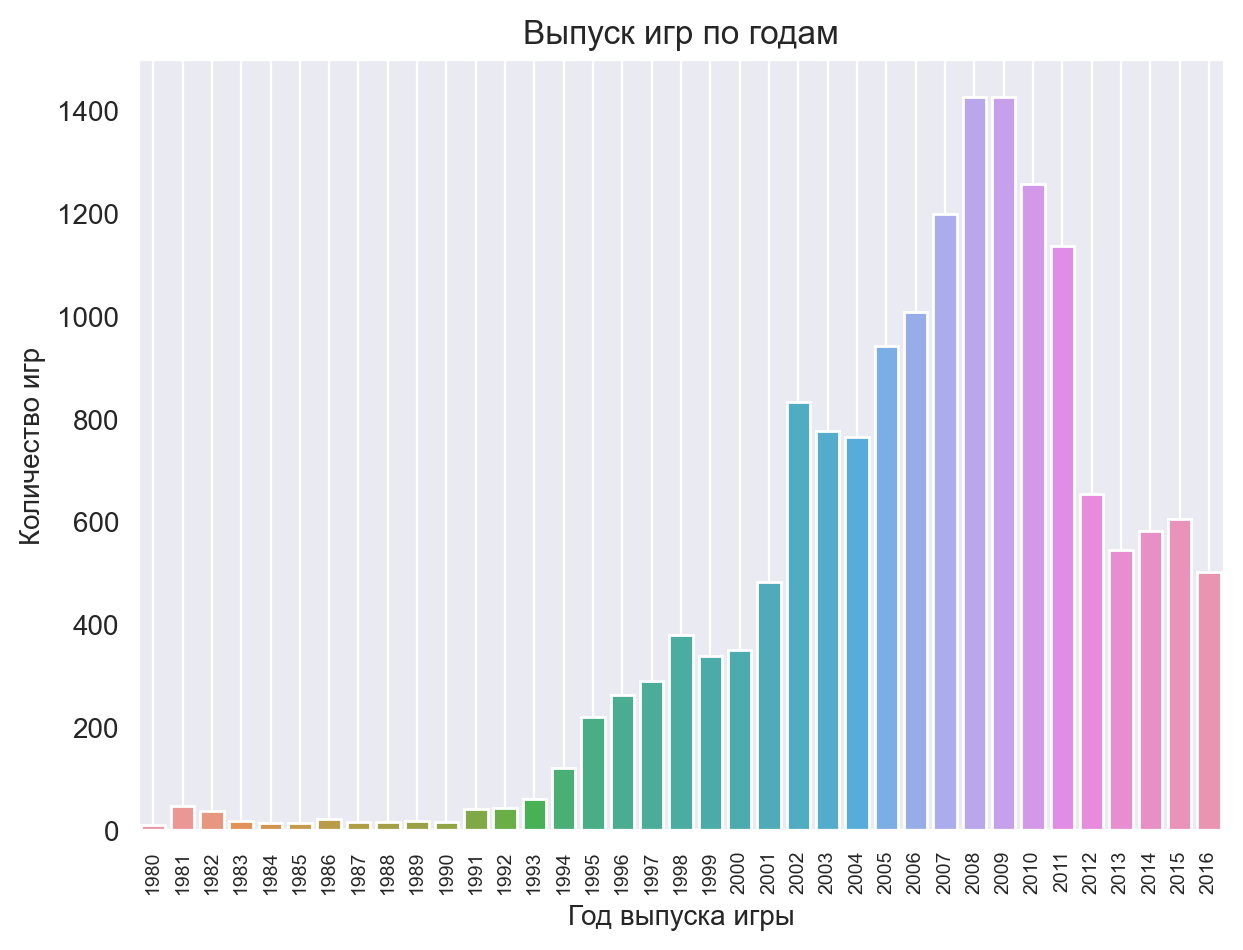

In [31]:
# построение графика количества выпускаемых игр по годам
sns.barplot(x=data_per_year.index, y=data_per_year['name'])
plt.title('Выпуск игр по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.xticks(fontsize=7, rotation=90)
plt.grid();

С 1994 года начался постепенный рост количества выпускаемых игр, это обусловлено развитием технологий, появлением новых платформ. Резкий рост произошел в 2002 году в связи с техническим совершенствованием платформ, а пик значений приходился на 2008-2009 год, что объясняется большой популярностью видеоигр и спросом на них. Начиная с 2012 года выпуск игр значительно снизился в связи с экономическим кризисом и расширением мобильного рынка.

In [32]:
# создание сводной таблицы с общим количеством продажам по платформам
data_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

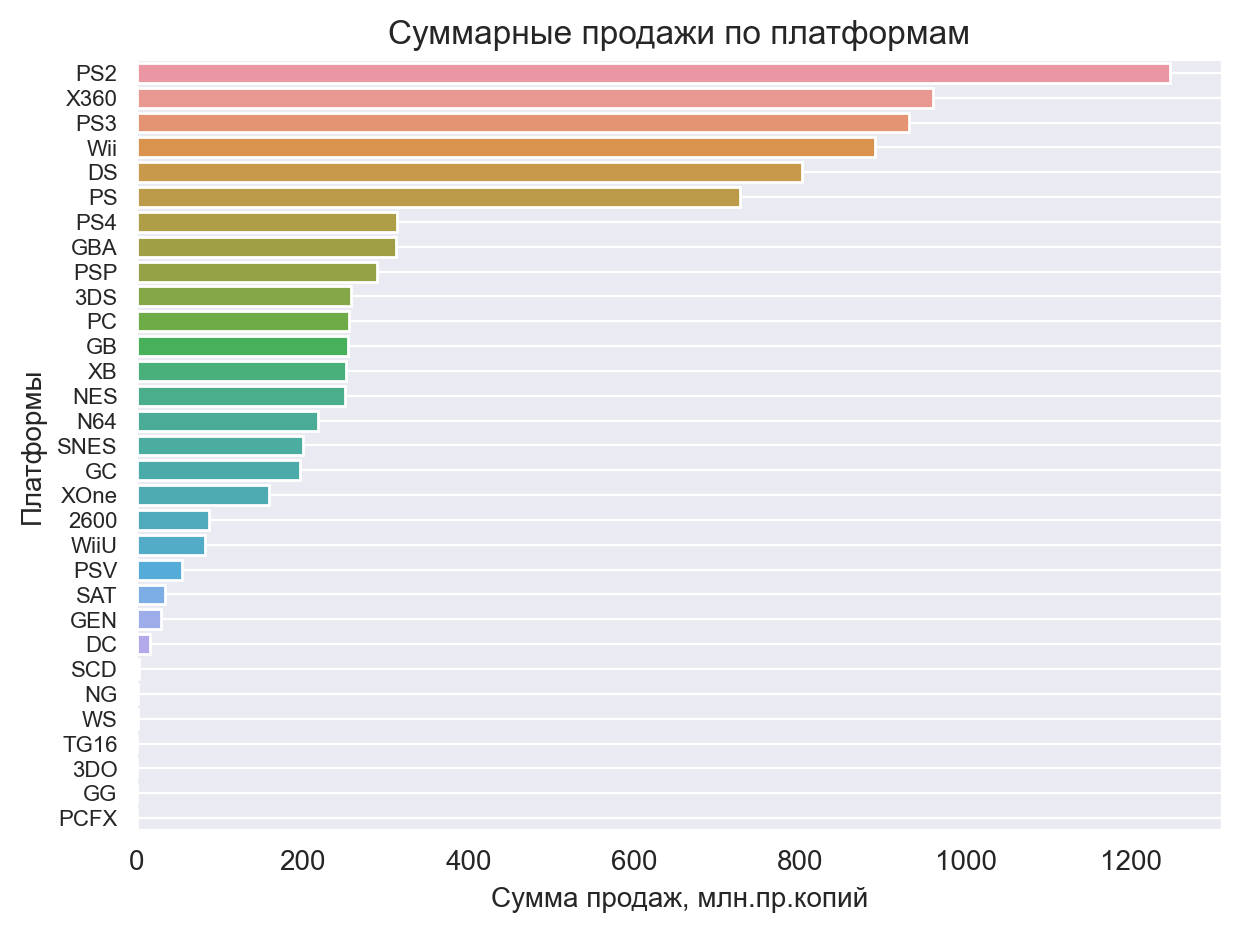

In [33]:
# построение графика суммарных продаж по платформам
sns.barplot(y=data_platform.index, x=data_platform['total_sales'])
plt.title('Суммарные продажи по платформам')
plt.grid()
plt.xlabel('Сумма продаж, млн.пр.копий')
plt.ylabel('Платформы')
plt.yticks(fontsize=8);

Самыми популярными игровыми платформами являются PlayStation 2, Xbox 360, PlayStation 3, Nintendo Wii, Nintendo DS и PlayStation.

In [34]:
# создание списка из топ-6 платформ
top_platforms = list(data_platform.index[:6])

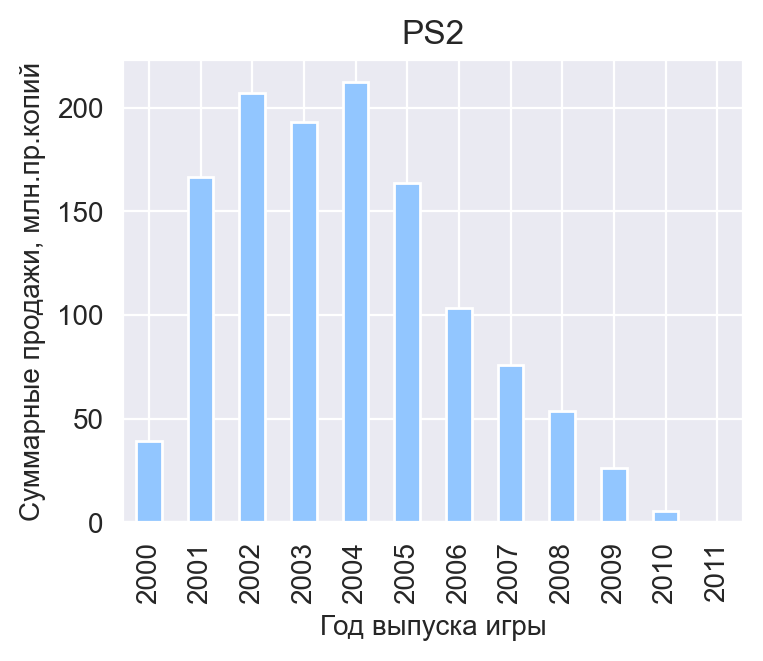

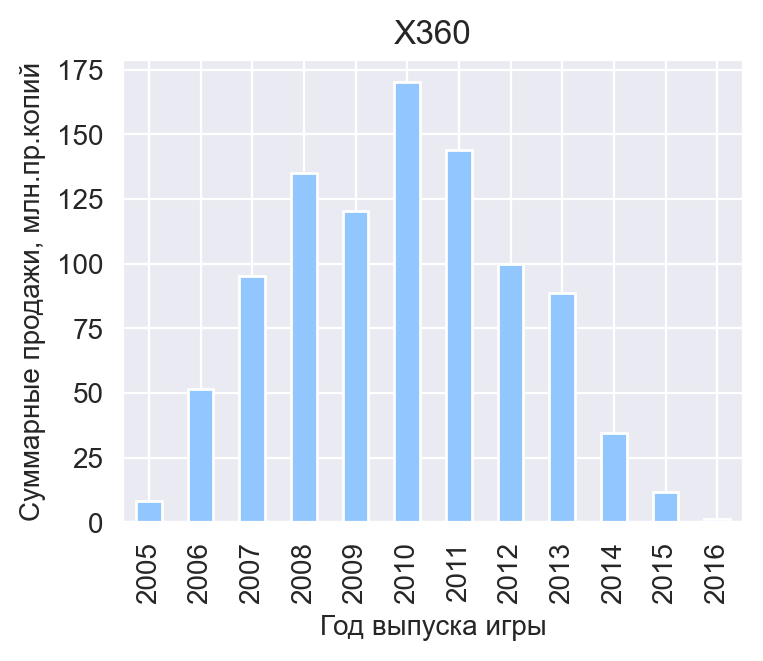

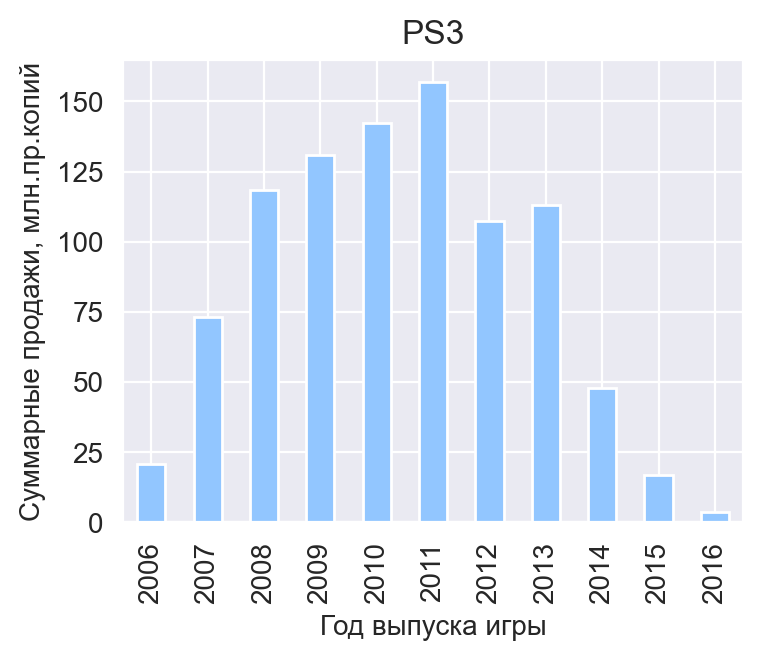

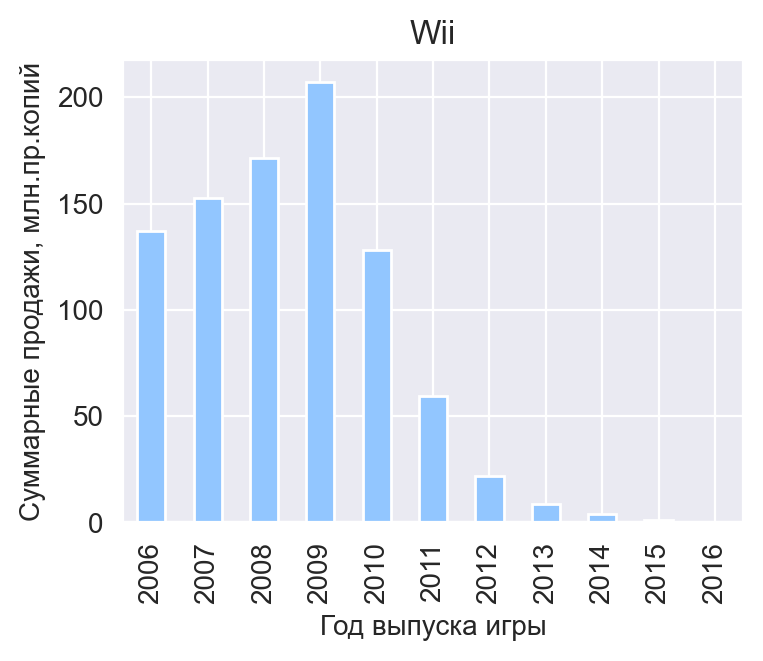

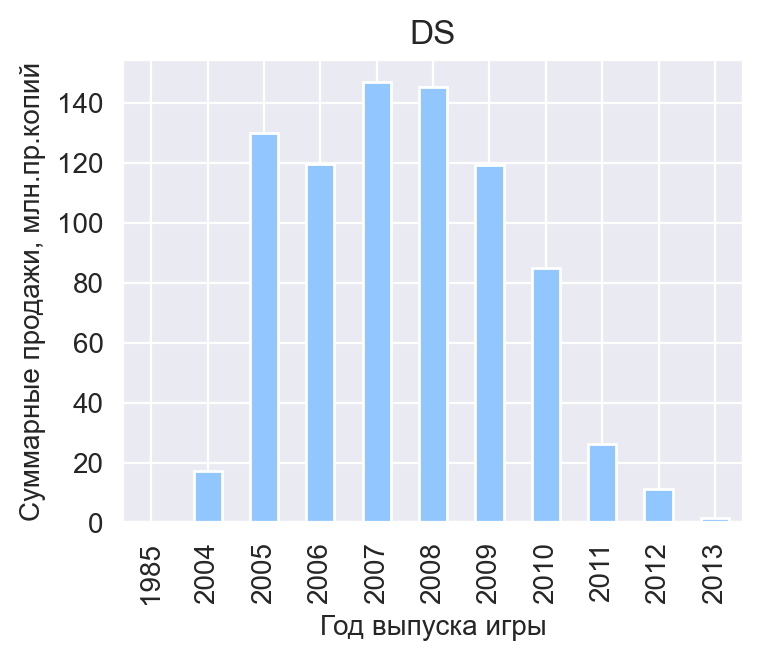

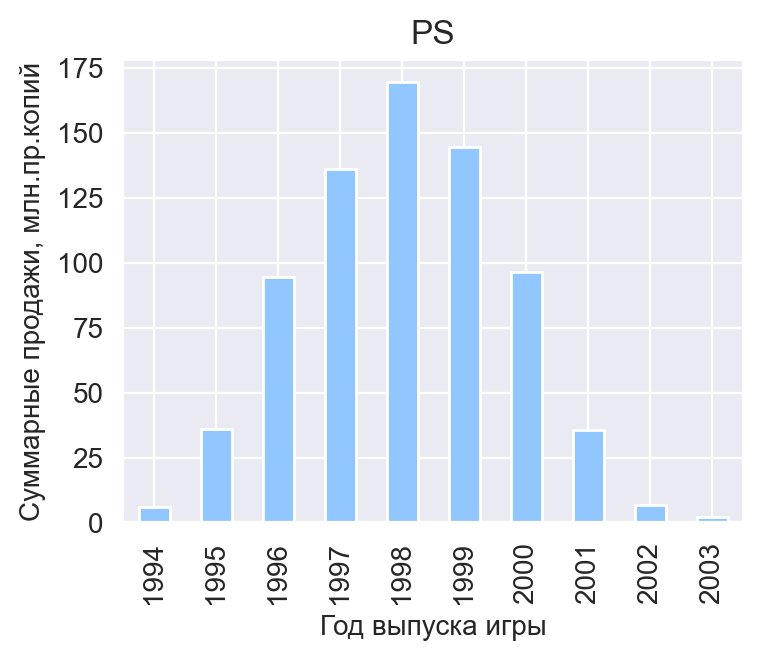

In [35]:
# построение графика суммарных продаж по годам в разрезе платформ
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', legend=False, figsize=(4, 3))
    plt.title(platform)
    plt.xlabel('Год выпуска игры')
    plt.ylabel('Суммарные продажи, млн.пр.копий');

Проанализировав суммарные продажи по годам в разрезе топ-6 платформ, наглядно можно увидеть, что:

- игры на PlayStation продавались с 1994 по 2003 год (9 лет);
- на PlayStation 2 с 2000 по 2011 год (11 лет);
- на Nintendo DS с 2004 по 2013 год (9 лет);
- на Xbox 360 с 2005 по 2016 год (11 лет);
- на PlayStation 3 с 2006 по 2016 год (10 лет);
- на Nintendo Wii с 2006 по 2016 год (10 лет).

Таким образом, новые платформы появляются, а старые исчезают, в среднем, за 10 лет.

Необходимо определить актуальный период, на основании данных которого будет строится прогноз на 2017 год. На мой взгляд, наиболее логично взять период с 2014 по 2016 год, т.к. в последние годы выпуск игр значительно снизился, а значит, предыдущие периоды брать в расчет не имеет смысла. Кроме того, в анализе не стоит учитывать устаревшие платформы.

In [36]:
# создание датафрейма со срезом по году выпуска (с 2014 года)
actual_data = data.query('year_of_release >= 2014')

In [37]:
# создание сводной таблицы с общим количеством продаж по платформам c 2012 года
data_platform_actual = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

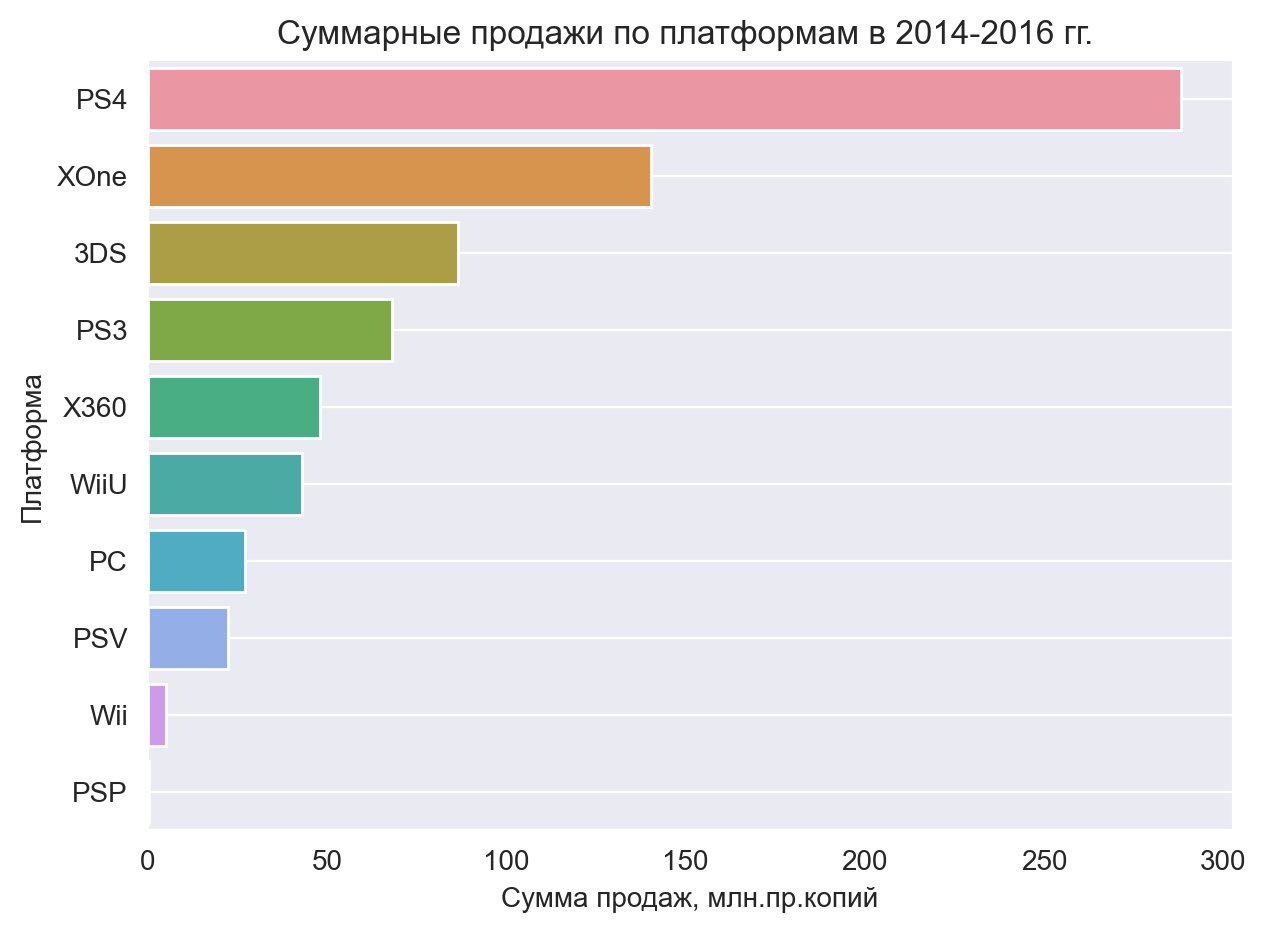

In [38]:
# построение графика суммарных продаж по платформам с 2012 года
sns.barplot(y=data_platform_actual.index, x=data_platform_actual['total_sales'])
plt.grid()
plt.title('Суммарные продажи по платформам в 2014-2016 гг. ')
plt.xlabel('Сумма продаж, млн.пр.копий')
plt.ylabel('Платформа');

Самыми популярными игровыми платформами за период 2014-2016 гг. являются PlayStation 4, Xbox One, Nintendo 3DS, PlayStation 3 и Xbox 360.

In [39]:
# создание списка из топ-5 платформ по сумме продаж за 2014-2016
platforms_actual = list(data_platform_actual.index[:5])

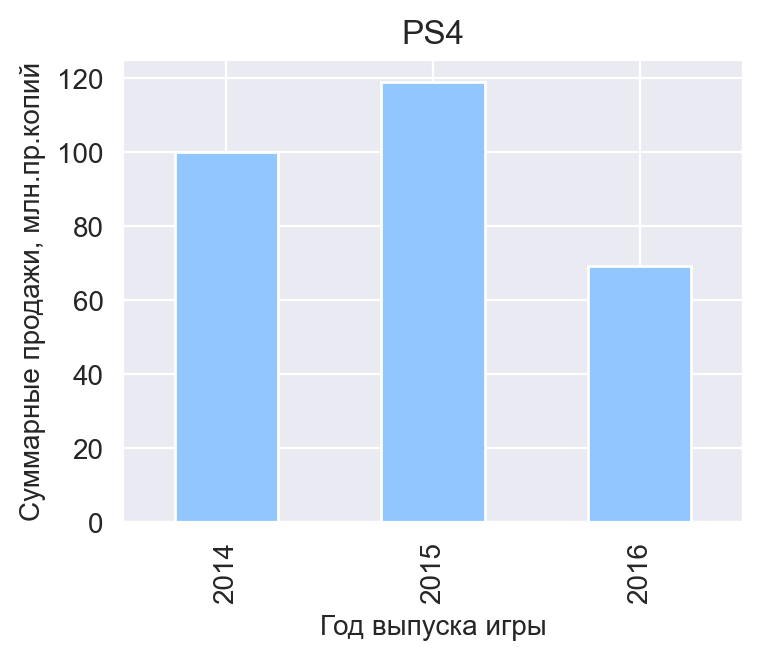

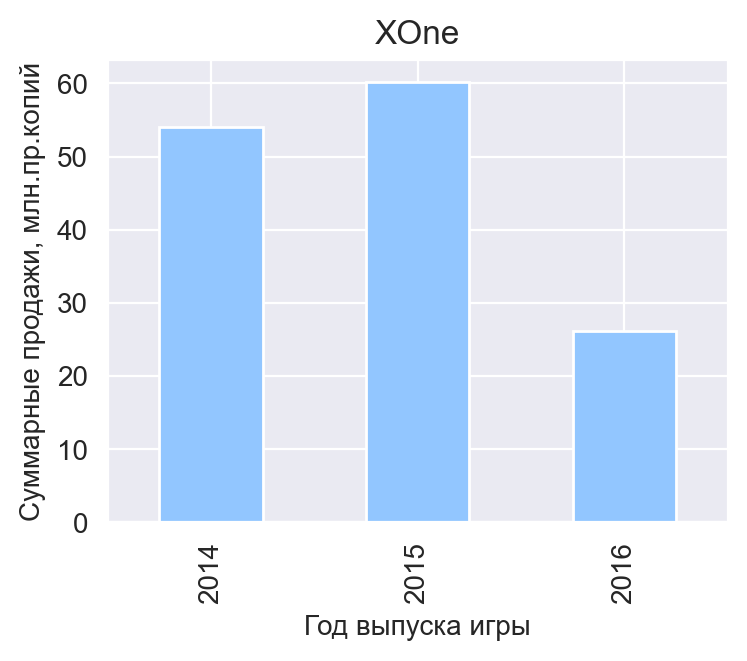

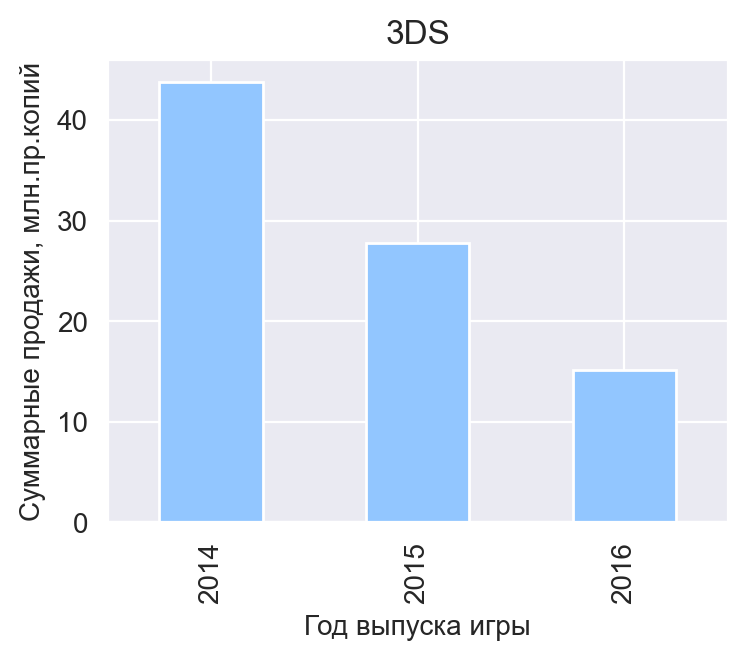

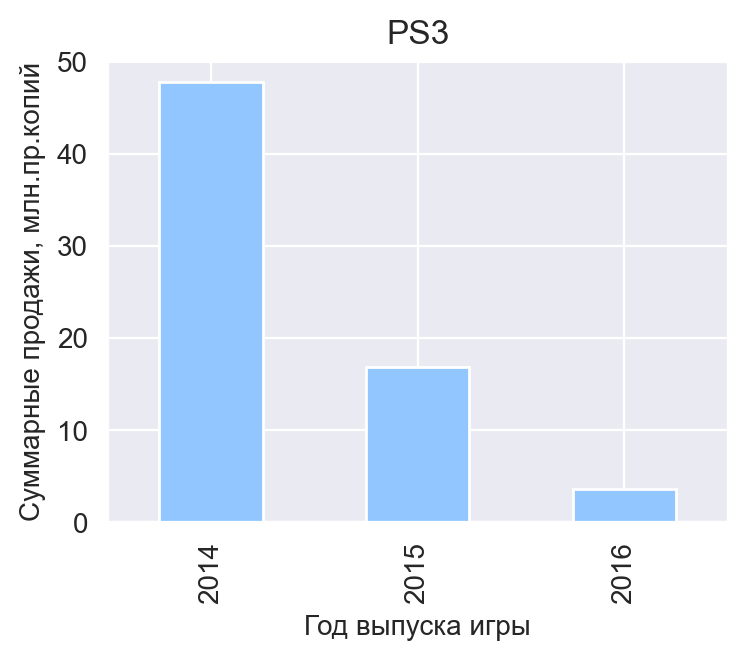

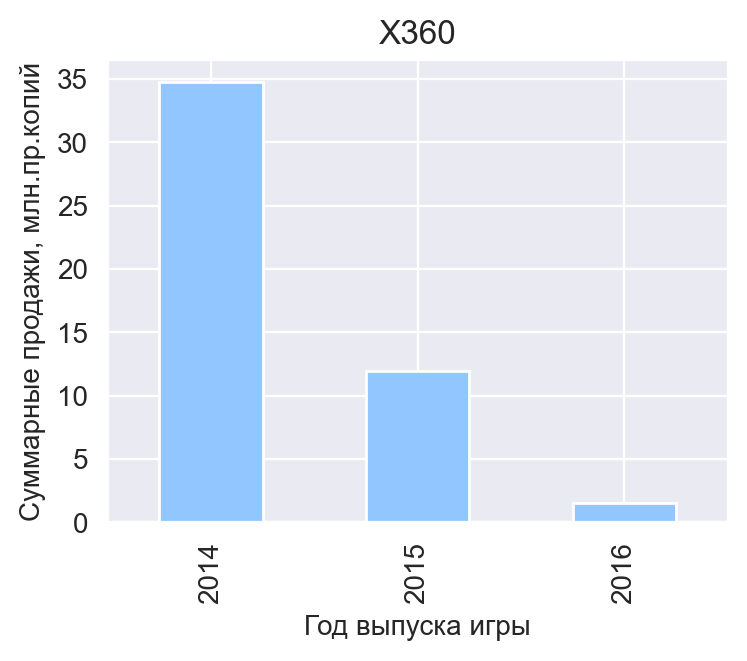

In [40]:
# построение графика суммарных продаж по топ-5 платформ за 2014-2016
for platform in platforms_actual:
    actual_data[actual_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', legend=False, figsize=(4, 3))
    plt.title(platform)
    plt.xlabel('Год выпуска игры')
    plt.ylabel('Суммарные продажи, млн.пр.копий');

Для более детального анализа построим график, визуализирующий изменение доли каждой платформы в итоговой сумме общего выпуска по годам.

In [41]:
# создание сводной таблицы с расчетом доли каждой платформы в итоговой сумме выпуска за год
shares = actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
shares = shares.fillna(0)
shares['sum'] = shares[['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']].sum(axis=1)
shares['3DS_share'] = shares['3DS'] / shares['sum']
shares['PC_share'] = shares['PC'] / shares['sum']
shares['PS3_share'] = shares['PS3'] / shares['sum']
shares['PS4_share'] = shares['PS4'] / shares['sum']
shares['PSP_share'] = shares['PSP'] / shares['sum']
shares['PSV_share'] = shares['PSV'] / shares['sum']
shares['Wii_share'] = shares['Wii'] / shares['sum']
shares['WiiU_share'] = shares['WiiU'] / shares['sum']
shares['X360_share'] = shares['X360'] / shares['sum']
shares['XOne_share'] = shares['XOne'] / shares['sum']
del shares['sum'], shares['3DS'], shares['PC'], shares['PS3'], shares['PS4'], shares['PSP'], shares['PSV'], shares['Wii'], shares['WiiU'], shares['X360'], shares['XOne']
shares.columns = ['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

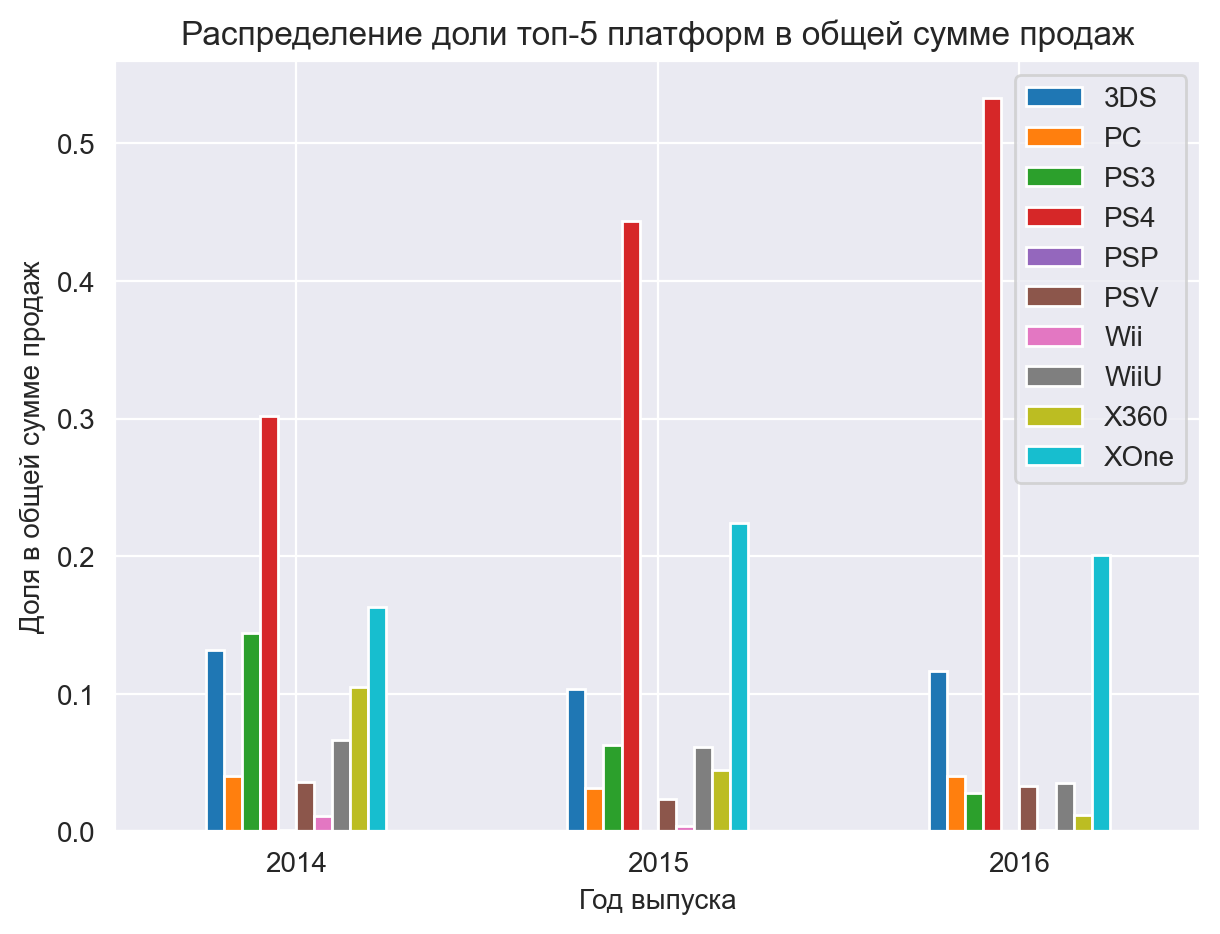

In [42]:
# построение графика по доли каждой платформе в общей сумме
shares.plot(kind='bar', legend=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Распределение доли топ-5 платформ в общей сумме продаж')
plt.xlabel('Год выпуска')
plt.ylabel('Доля в общей сумме продаж')
plt.xticks(rotation=360);

На основании построенного графика можно сделать вывод о том, что в 2016 году наблюдается рост суммарного количества продаж на PlayStation 4, Nintendo 3DS, PC и PlayStation Vita. Небольшой спад наблюдается у игр, выходящих на Xbox One, и значительное уменьшение количества продаж можно заметить у PlayStation 3, Nintendo WiiU и Xbox 360.

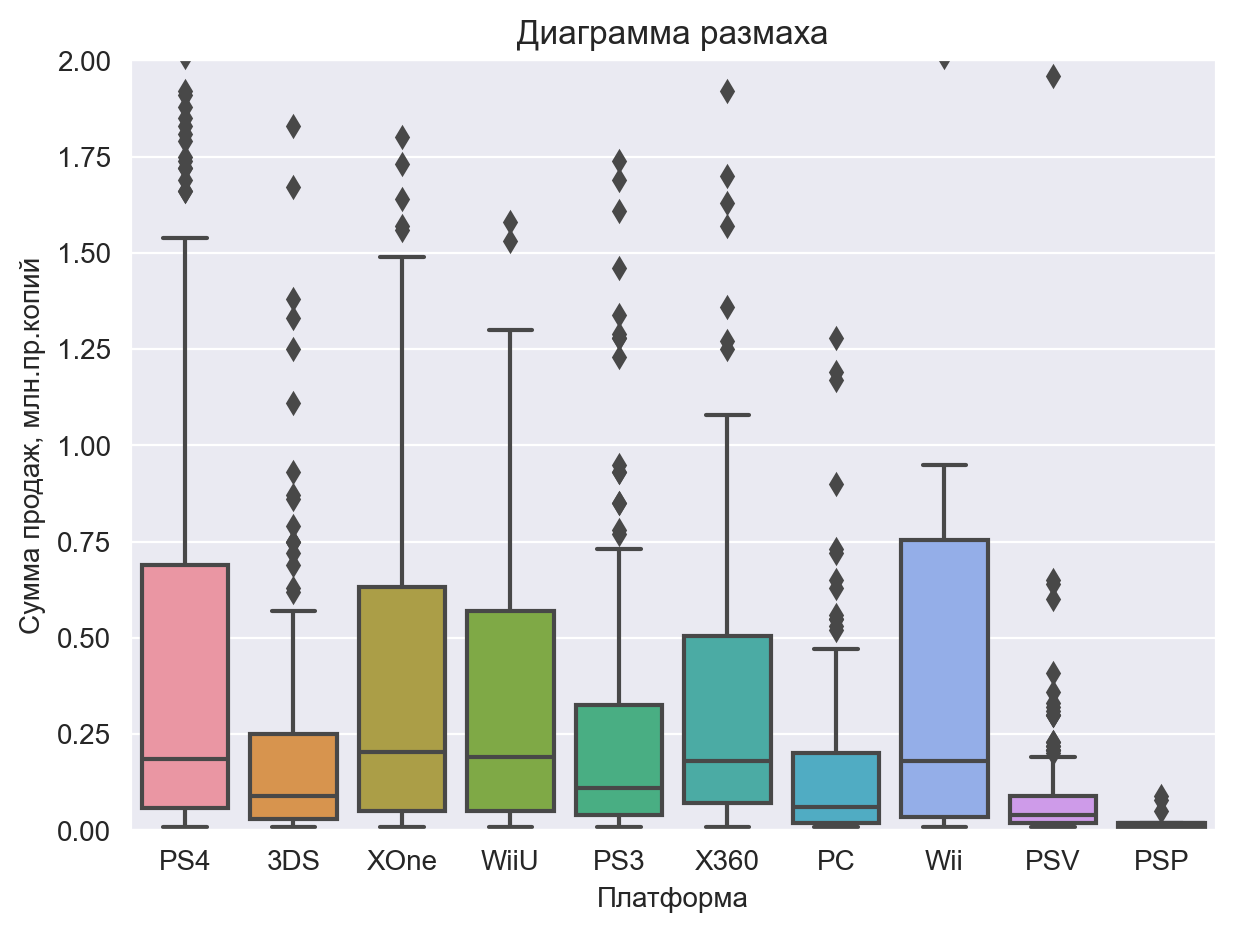

In [43]:
# построение диаграммы размаха по сумме продаж для каждой платформы
sns.boxplot(data=actual_data, x='platform', y='total_sales')
plt.ylim(0, 2)
plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж, млн.пр.копий');

По результатам построенных "ящиков с усами" для всех платформ, на которых были выпущены игры в 2014-2016 годах, можно говорить о том, что значение медианы у платформ отличается: выше всего у Xbox One, PlayStation 4, Xbox 360, Nintendo Wii, Nintendo WiiU, а меньше всего у PlayStation Portable и PlayStation Vita. Верхняя граница межквартильного размаха, за которой наблюдаются аномалии, выше всего у PlayStation 4 (на уровне 1.55 млн.пр.копий).

Для того, чтобы оценить, как влияют на продажи отзывы пользователей и критиков, возьмем самую популярную на конец 2016 года платформу - PlayStation 4.

In [44]:
# создание датафрейма из игр на наиболее популярной платформе - PS4
data_ps4 = actual_data.query('platform == "PS4"')
#and not critic_score.isna() and not user_score.isna()
data_ps4 = data_ps4.loc[:, ['critic_score', 'user_score', 'total_sales']].reset_index(drop=True)

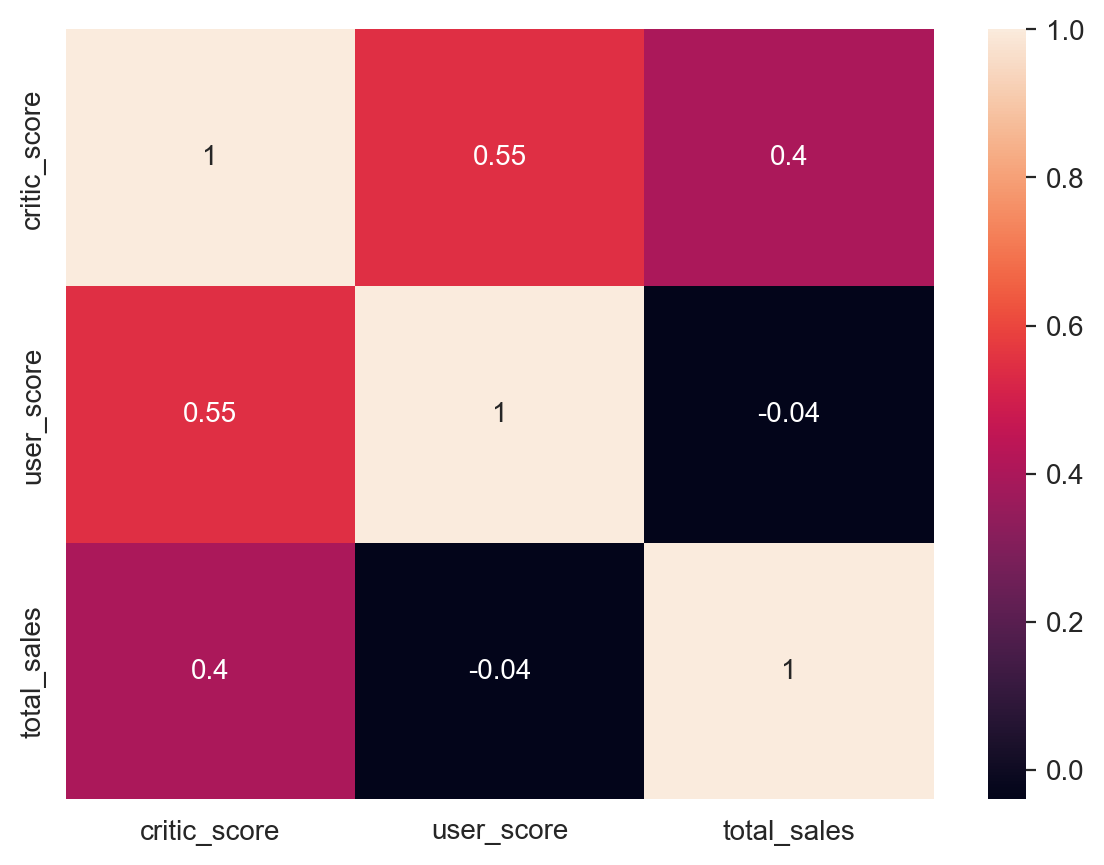

In [45]:
# расчет коэффициентов корреляции 
sns.heatmap(data_ps4.corr(), annot=True);

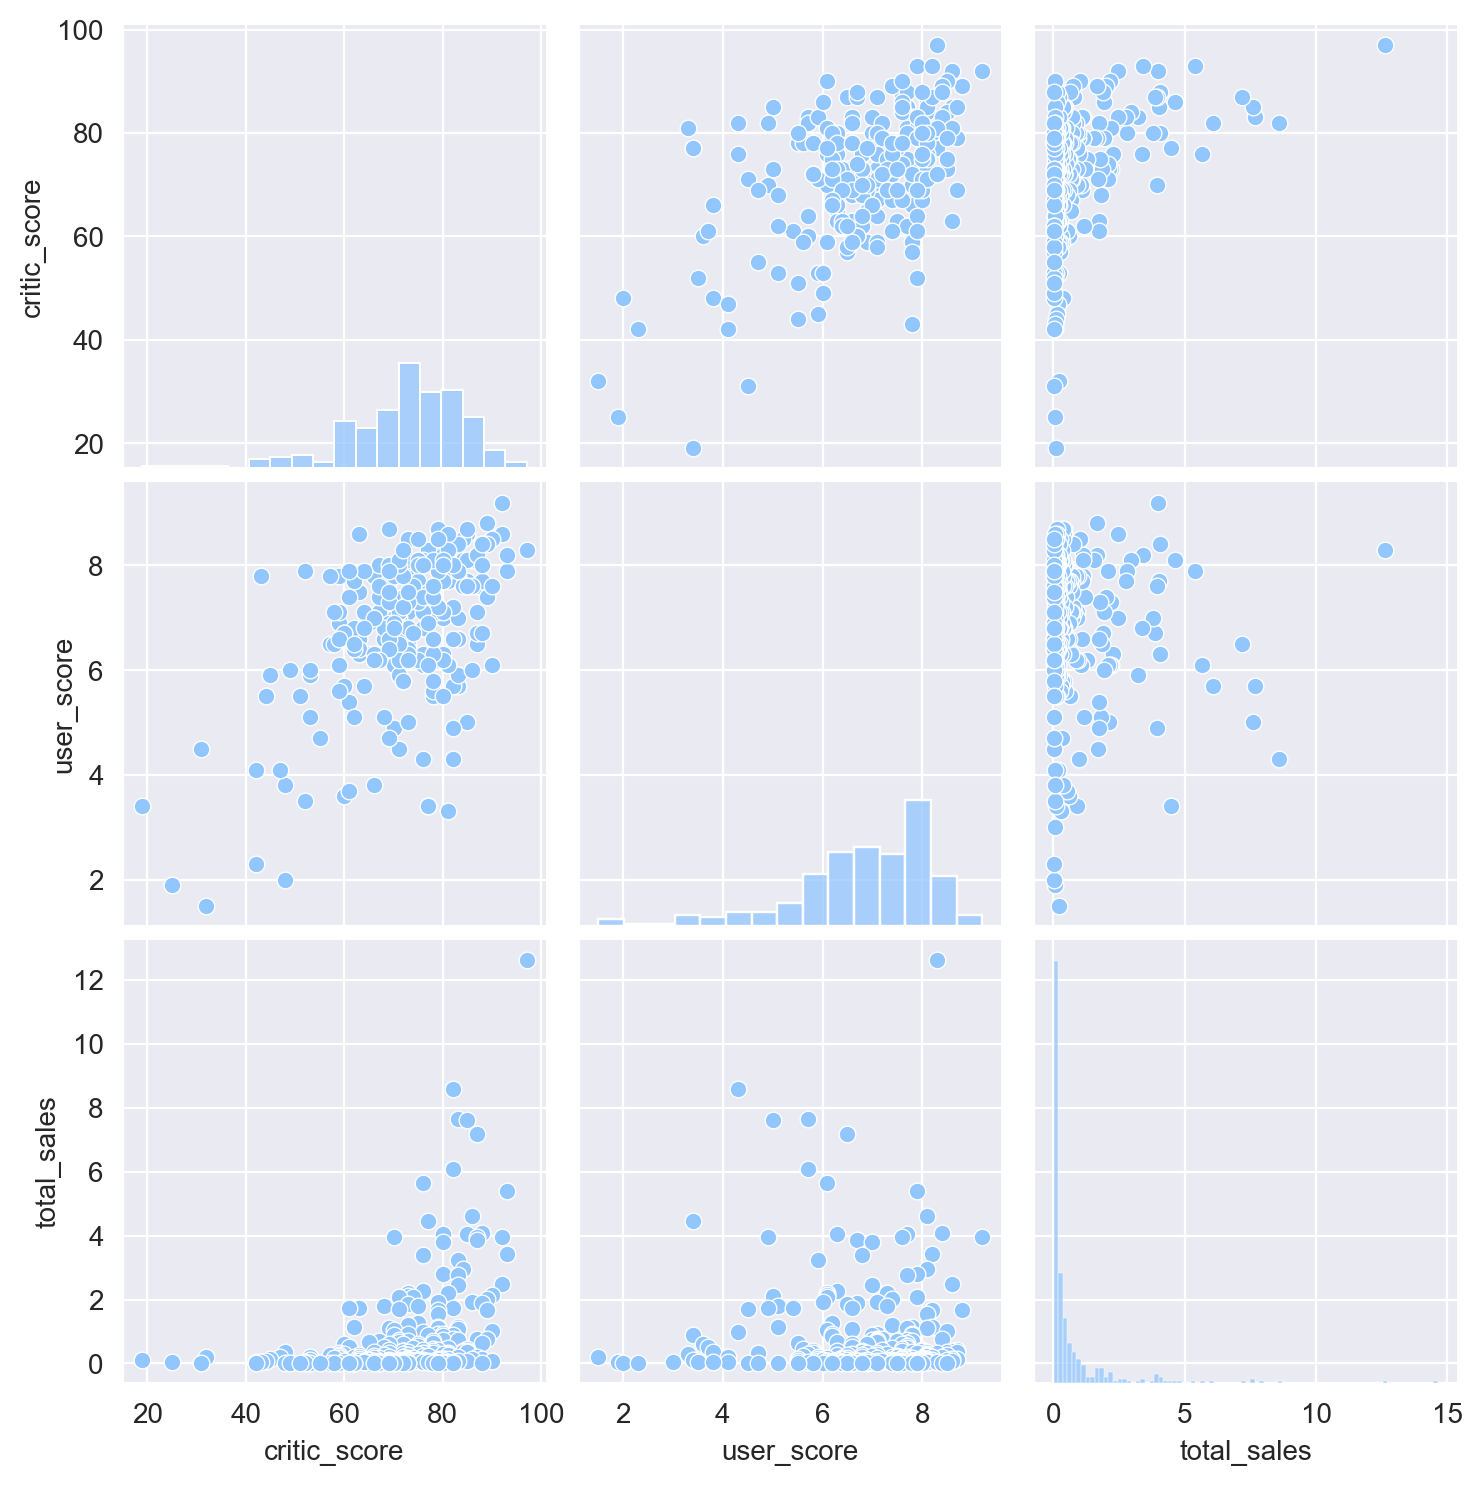

In [46]:
# построение диаграмм рассеяния
sns.pairplot(data=data_ps4);

На продажи внутри PlayStation 4 сильнее всего влияют отзывы критиков, есть прямая корреляция между этими двумя показателями. Отзывы пользователей, напротив, практически не оказывают влияния на сумму продаж. Кроме того, можно заметить, что есть зависимость между оценкой критиков и оценкой пользователей (чем выше оценка критика, тем выше будет оценка пользователя).

Проведем подобное исследование для топ-5 популярных платформ.

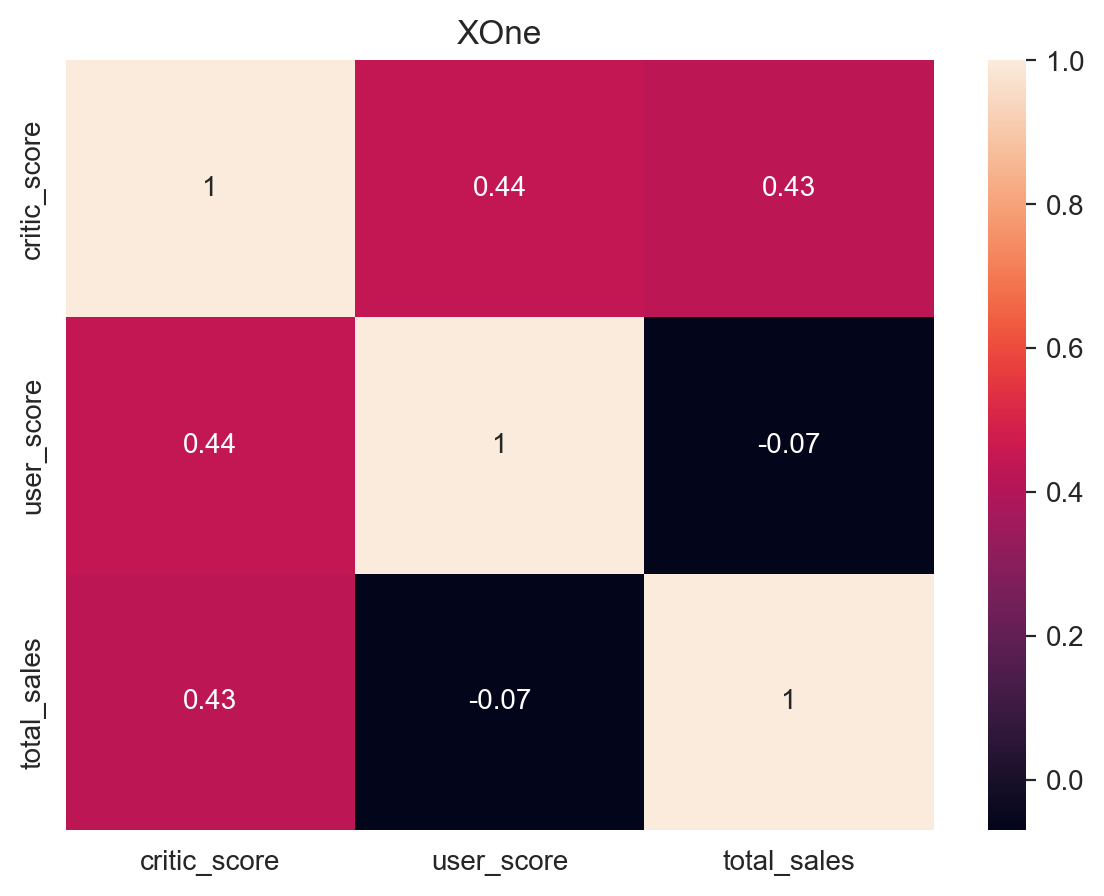

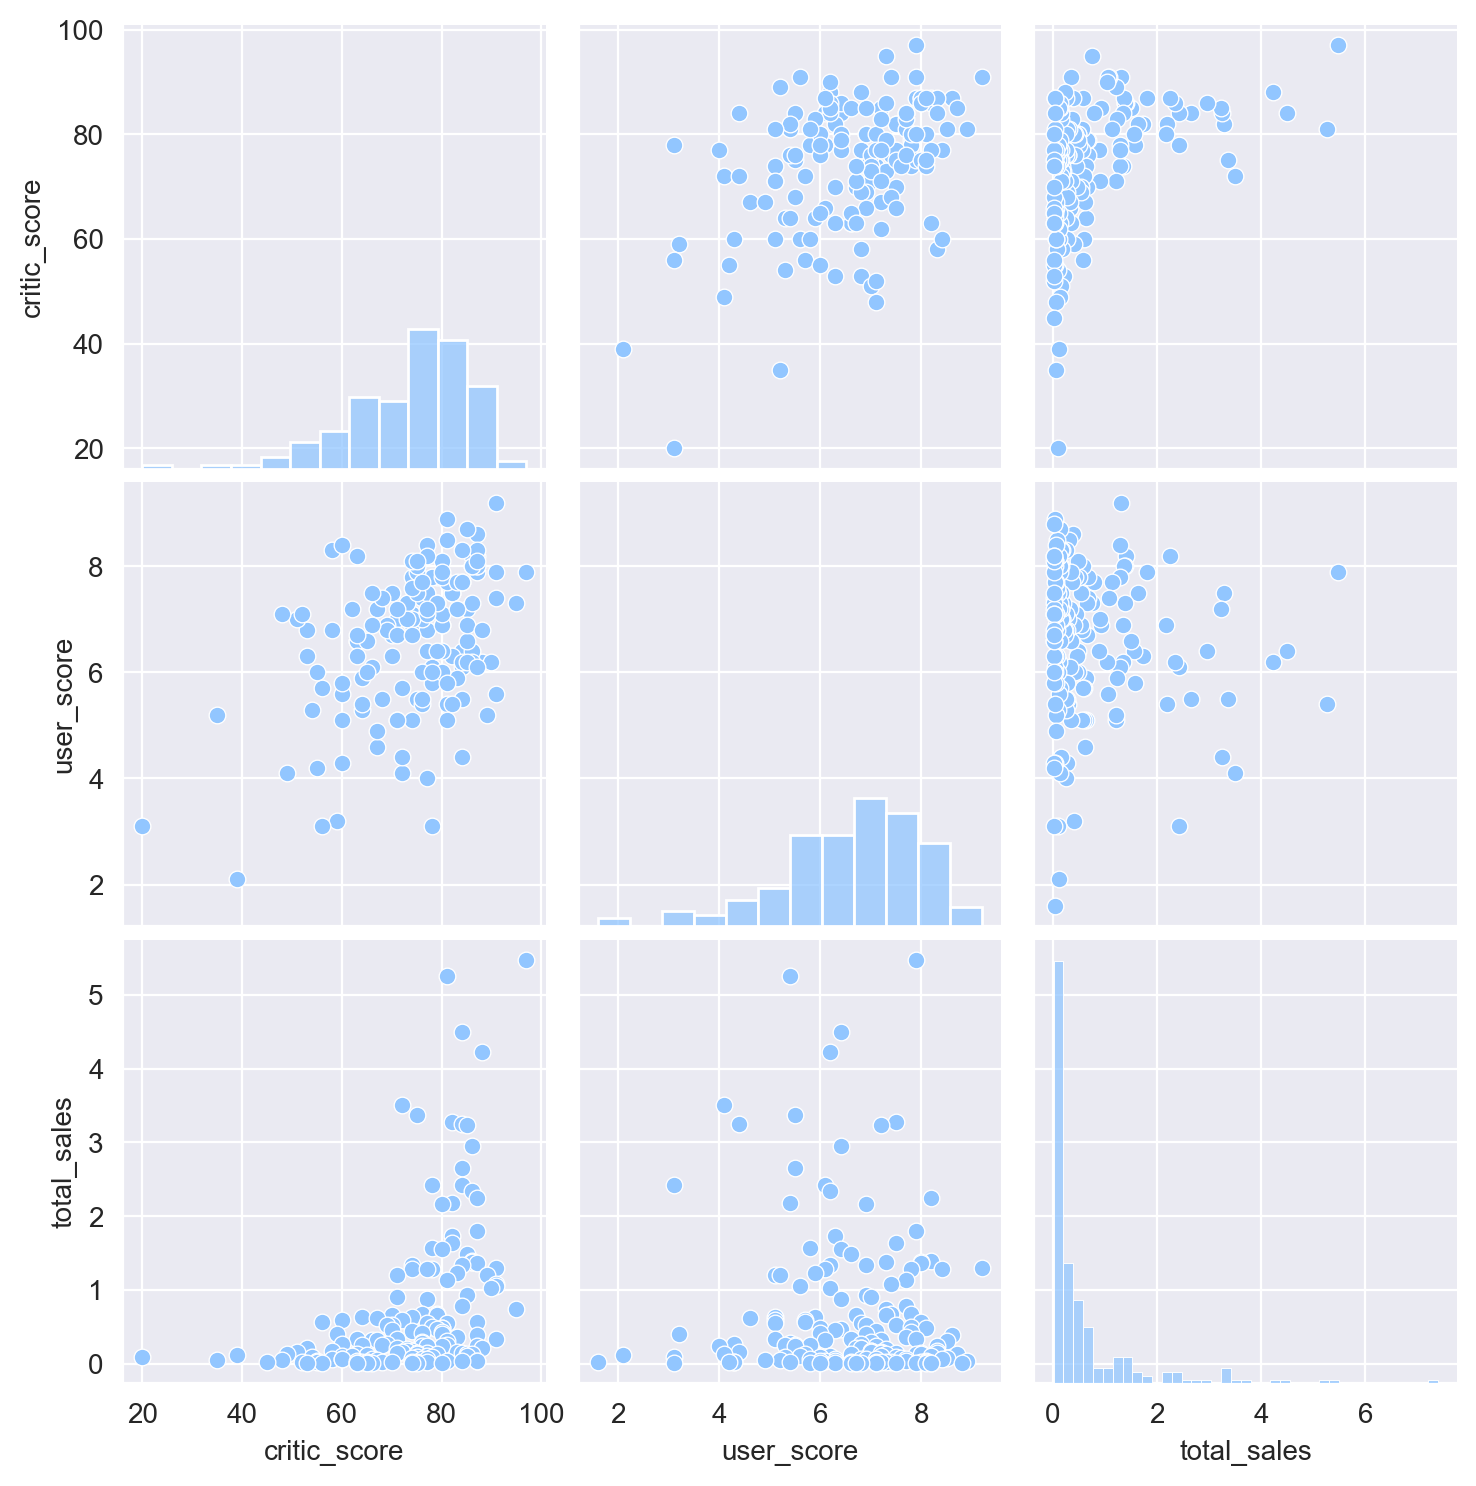

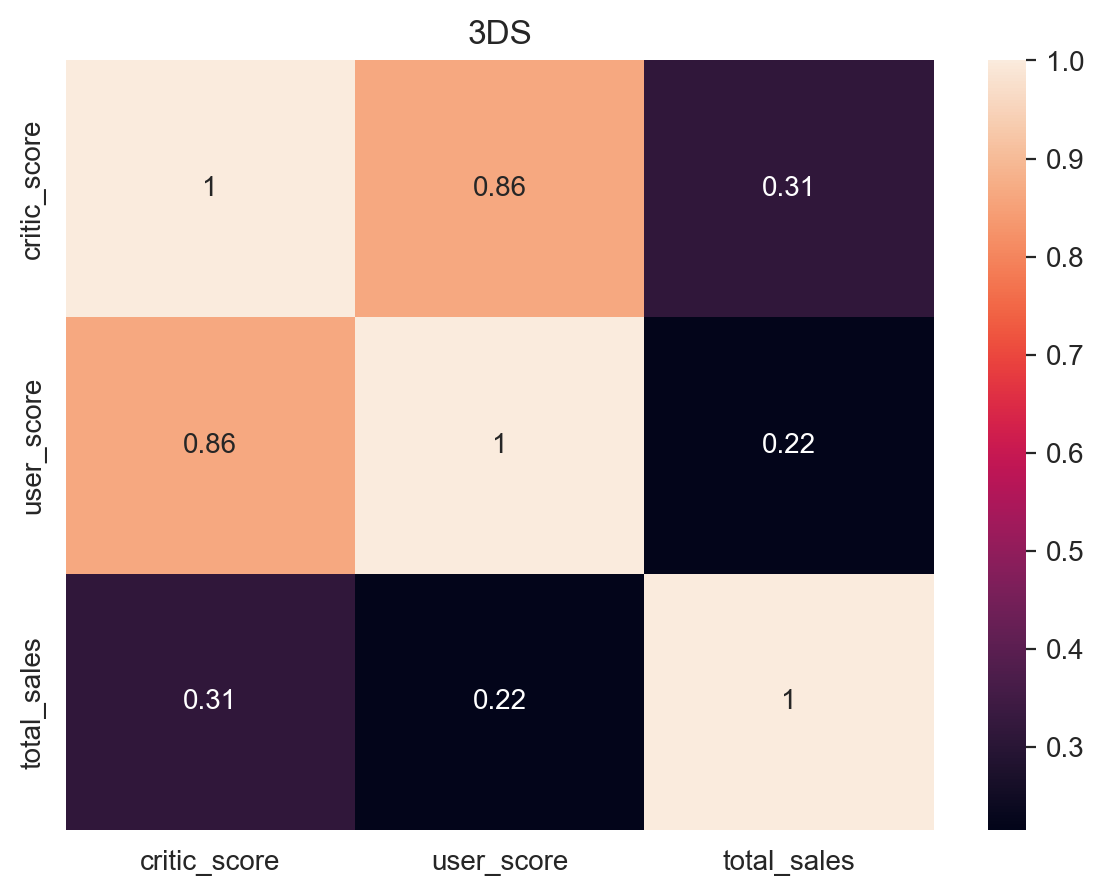

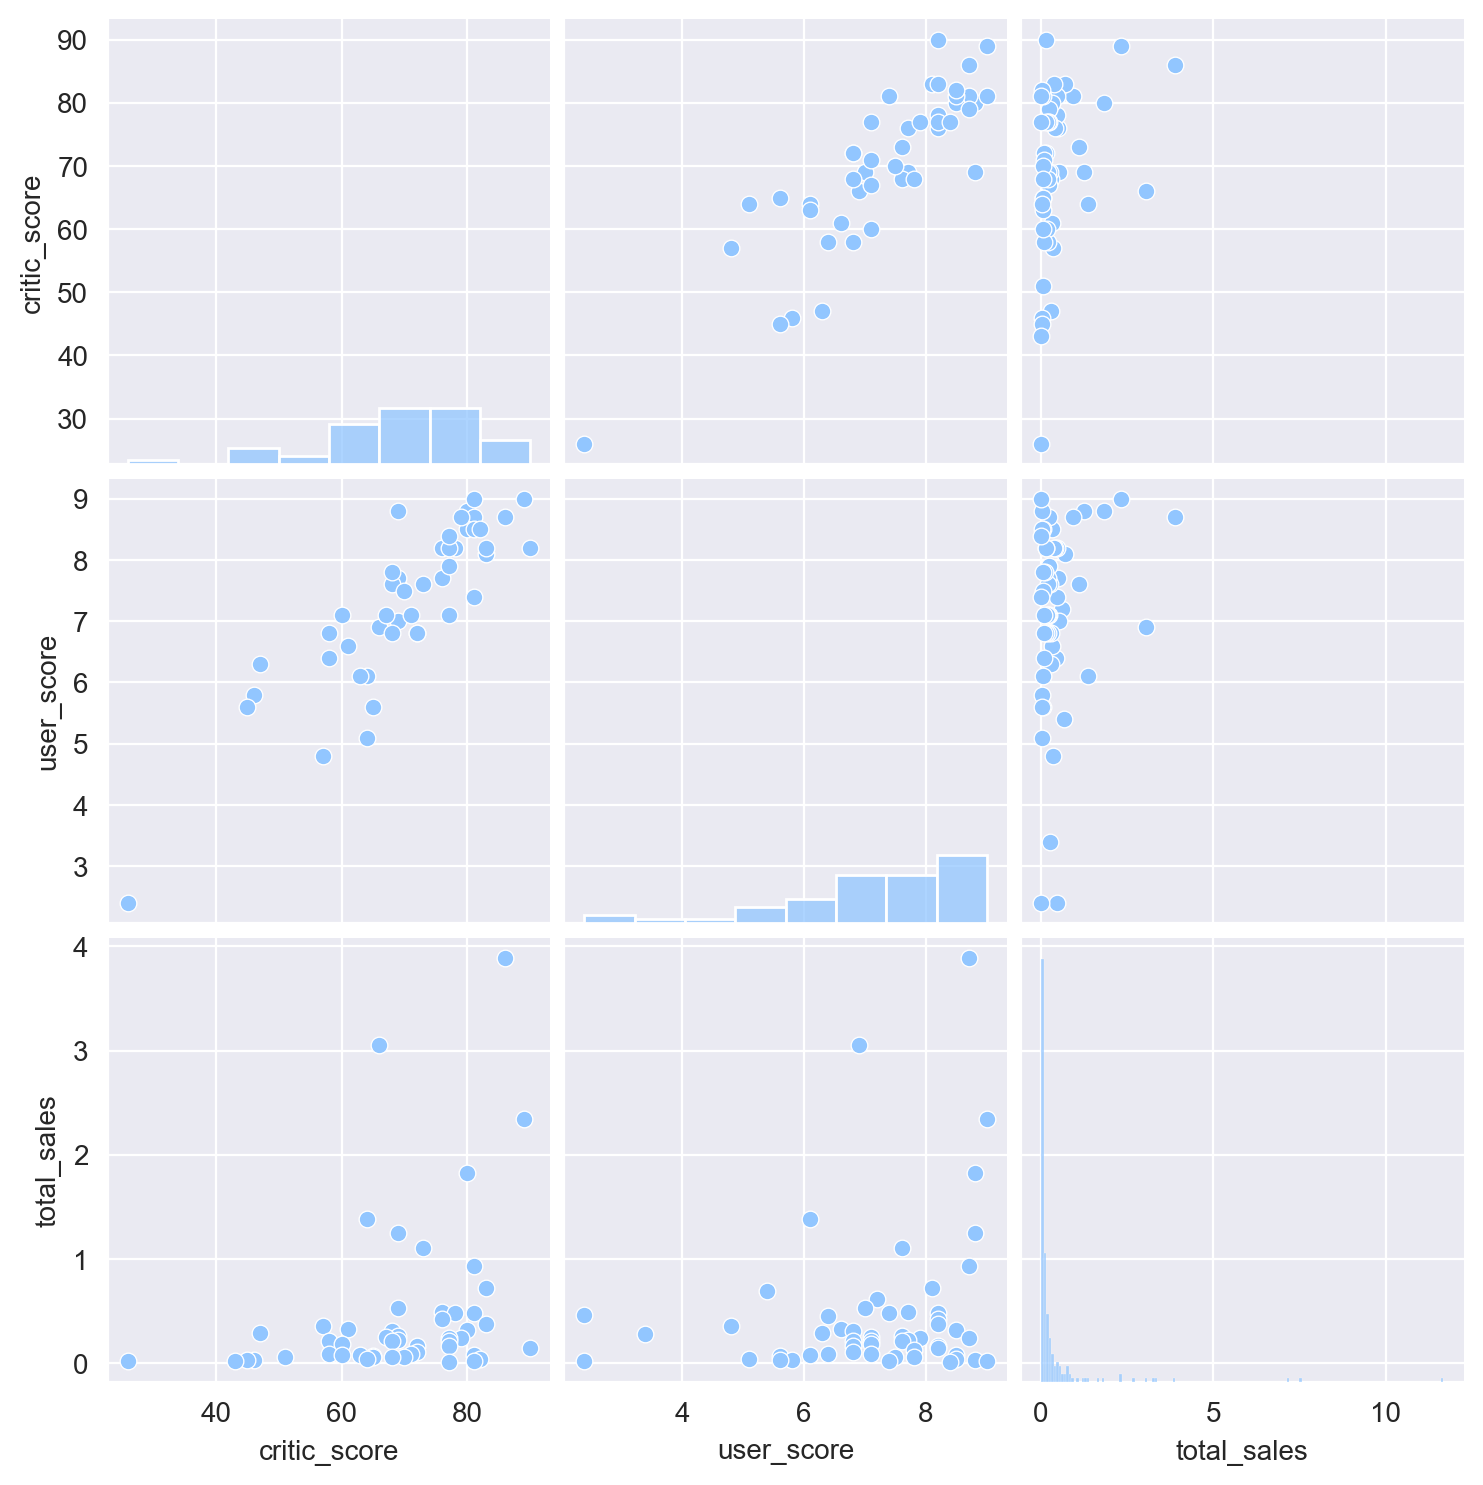

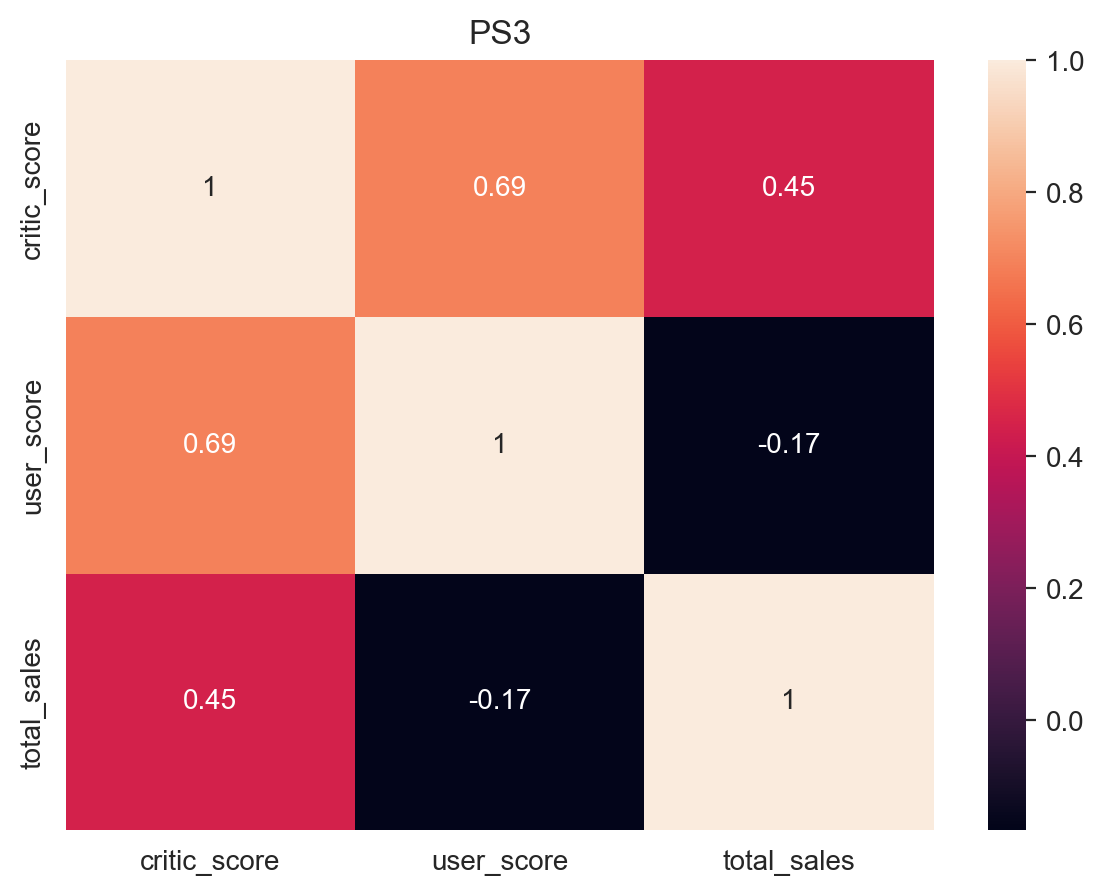

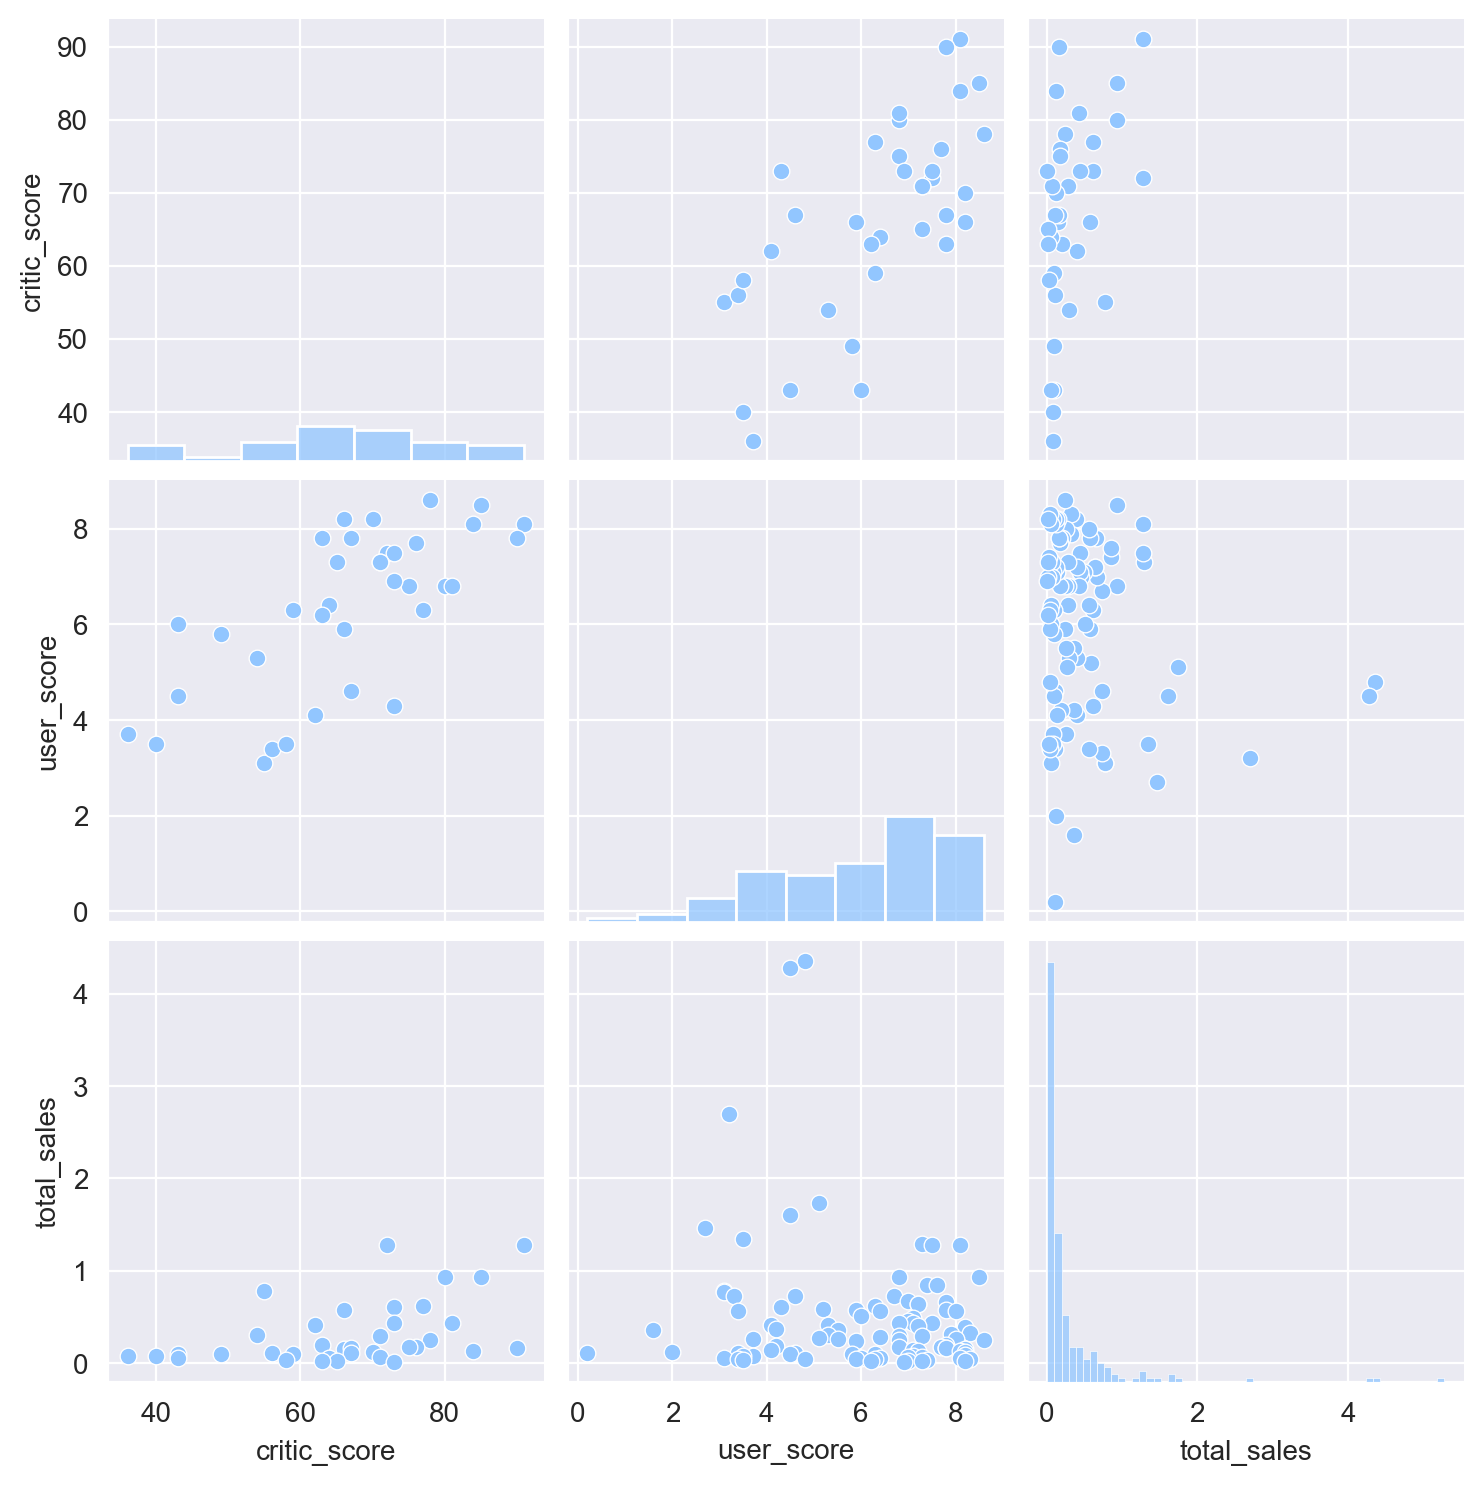

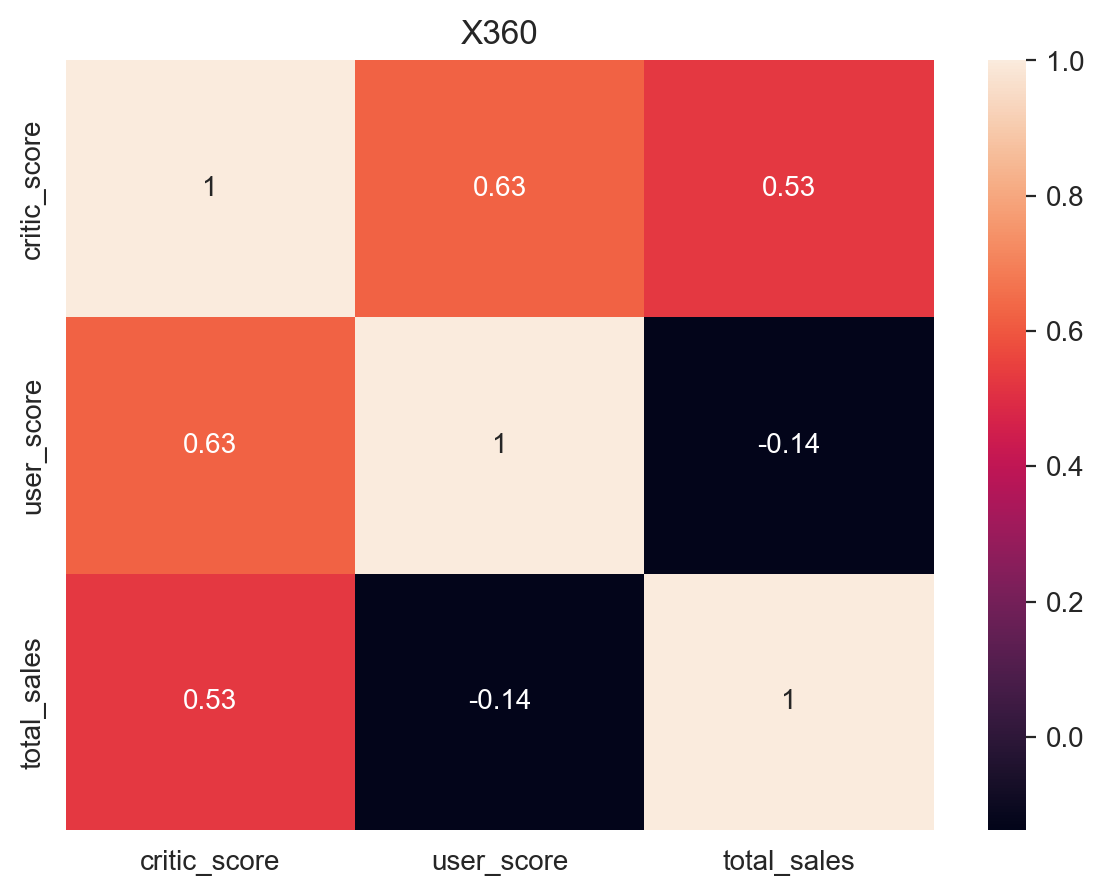

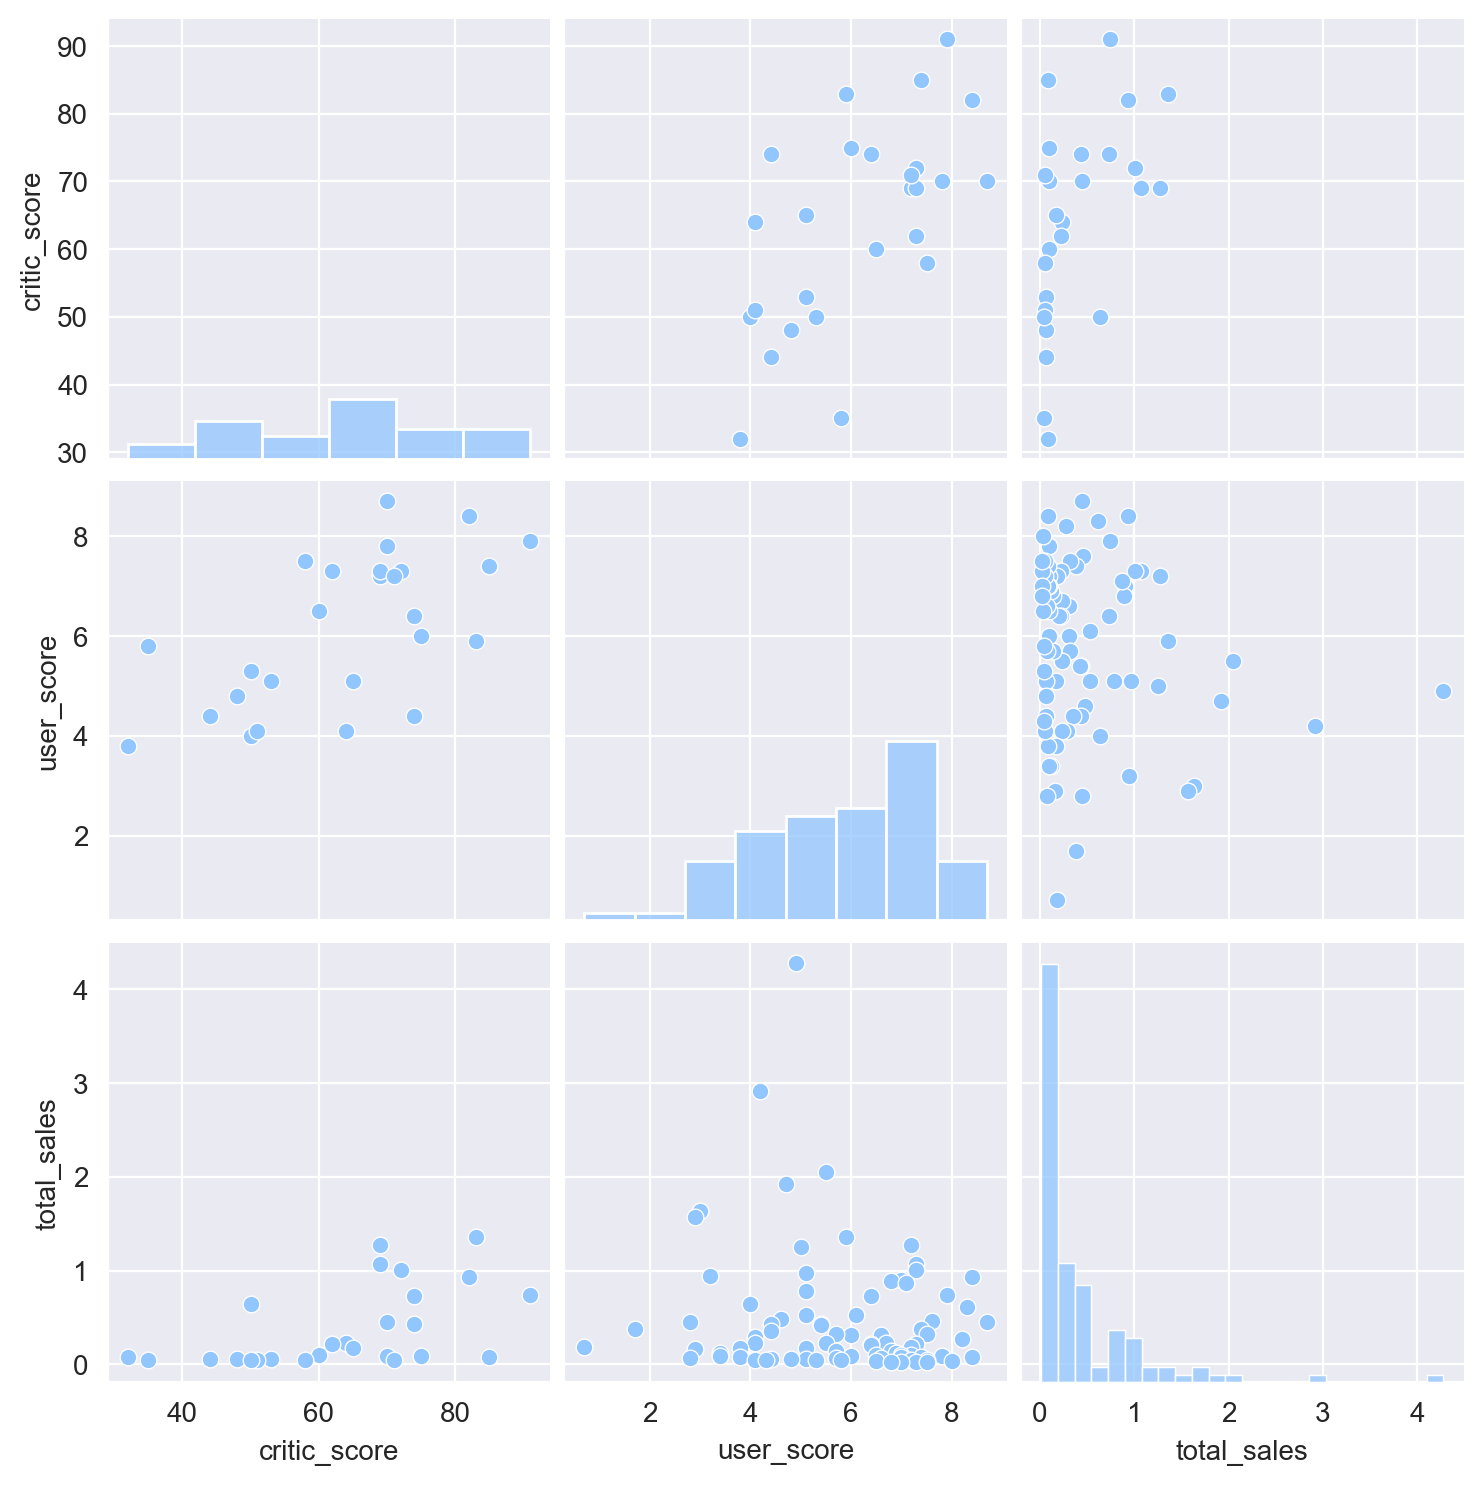

In [47]:
# создание функции для расчета коэффициентов корреляции и построения диаграмм рассеяния
def calc_corr(table, list):
    for platform in list:
        df = table.query('platform == @platform')
        df = df.loc[:, ['critic_score', 'user_score', 'total_sales']].reset_index(drop=True)
        sns.heatmap(df.corr(), annot=True)
        plt.title(platform)
        plt.show()
        sns.pairplot(data=df)
        plt.show();
calc_corr(actual_data, ['XOne', '3DS', 'PS3', 'X360'])

Для PlayStation 3, Xbox 360 и Xbox One зависимость между оценкой критиков и суммой продажам чуть выше, чем у PlayStation 4. А вот у Nintendo 3DS чуть ниже. Кроме того, прослеживается взаимозависимость оценки критиков и оценки пользователей. Также, из всех платформ у Nintendo 3DS чуть выше корреляция между оценкой пользователей и продажами.

In [48]:
# создание сводной таблицы с медианным значением продажам по жанрам
data_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values('total_sales', ascending=False)

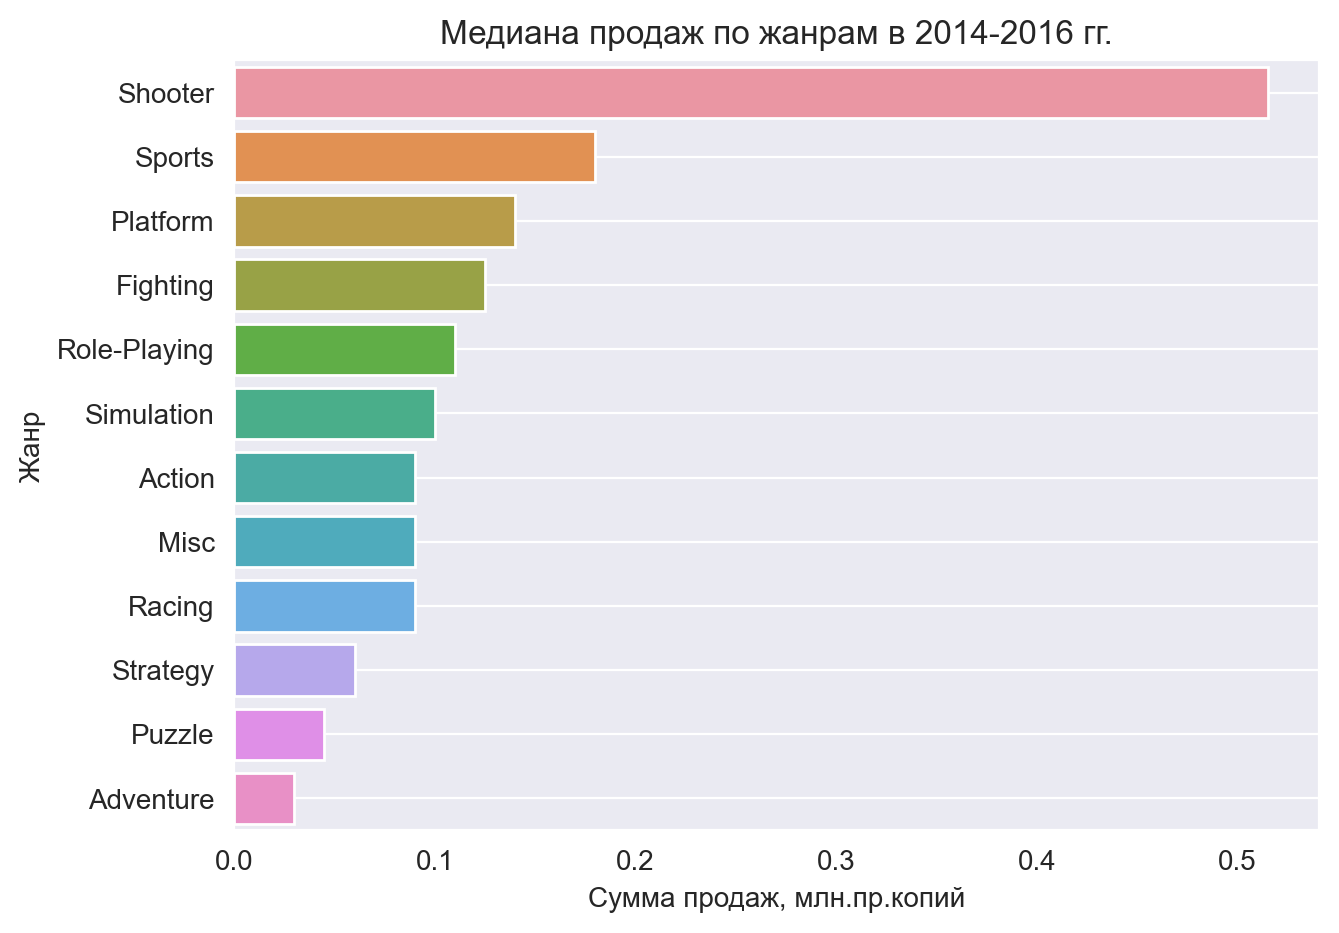

In [49]:
# построение графика медианного значения  продаж по жанрам с 2014 года
sns.barplot(y=data_genre.index, x=data_genre['total_sales'])
plt.grid()
plt.title('Медиана продаж по жанрам в 2014-2016 гг.')
plt.xlabel('Сумма продаж, млн.пр.копий')
plt.ylabel('Жанр');

По медианному значению продаж лидирует жанр Shooter. Наиболее прибыльными жанрами также являются Sports, Platform и Fighting.

## 4 Составление портрета пользователя каждого региона

In [50]:
# создание сводной таблицы с группировкой суммы продаж в регионах по виду платформы
data_region_platform = actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

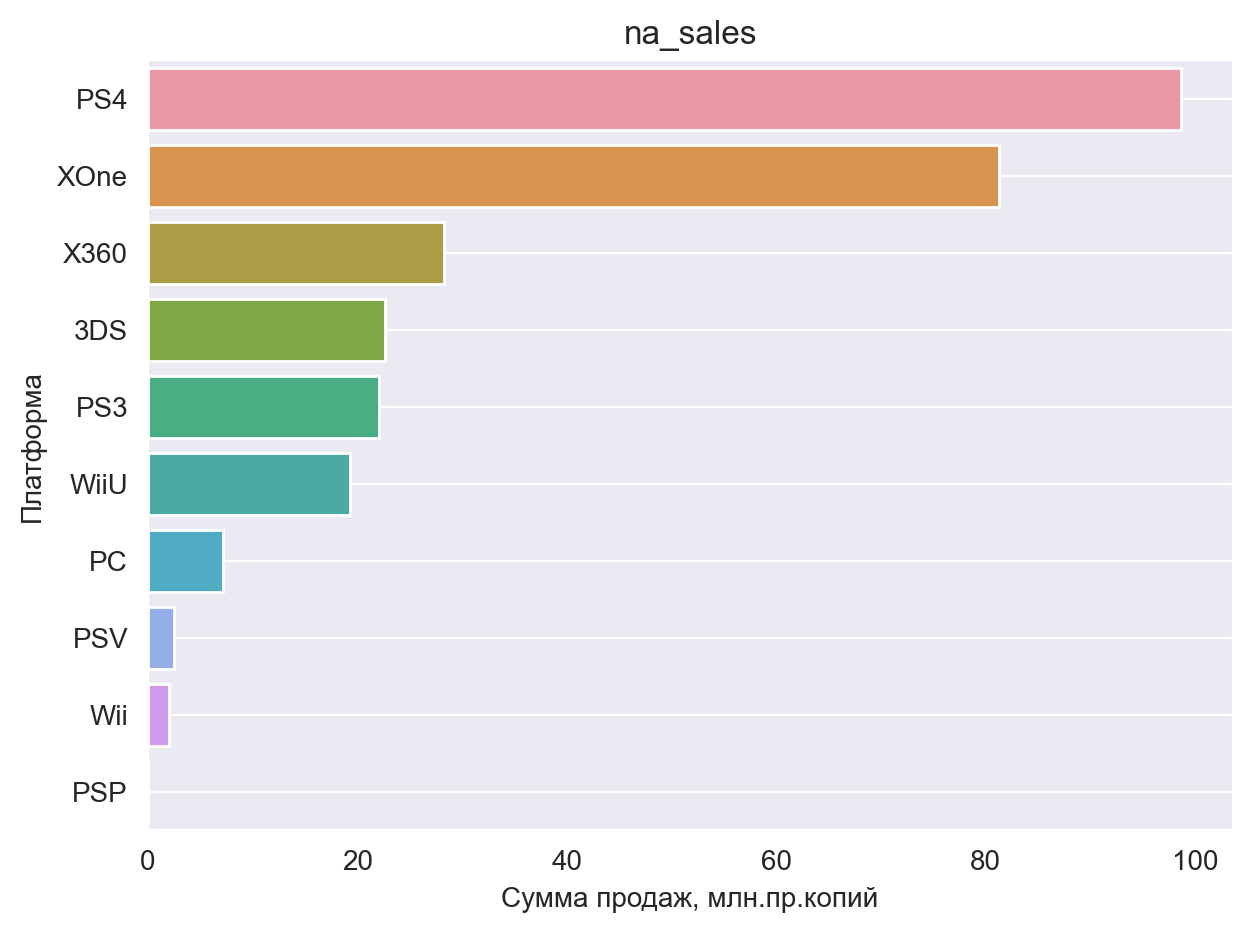

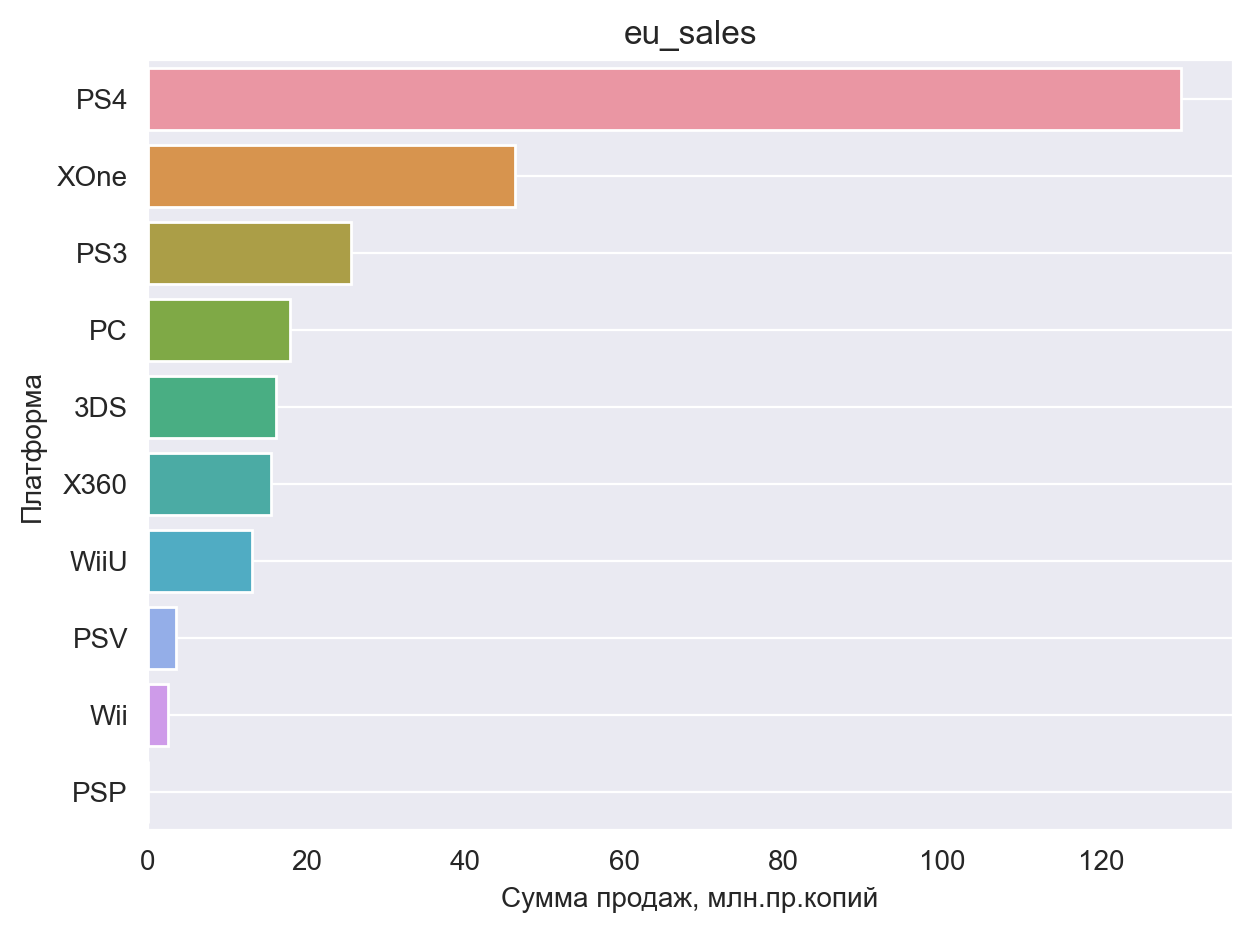

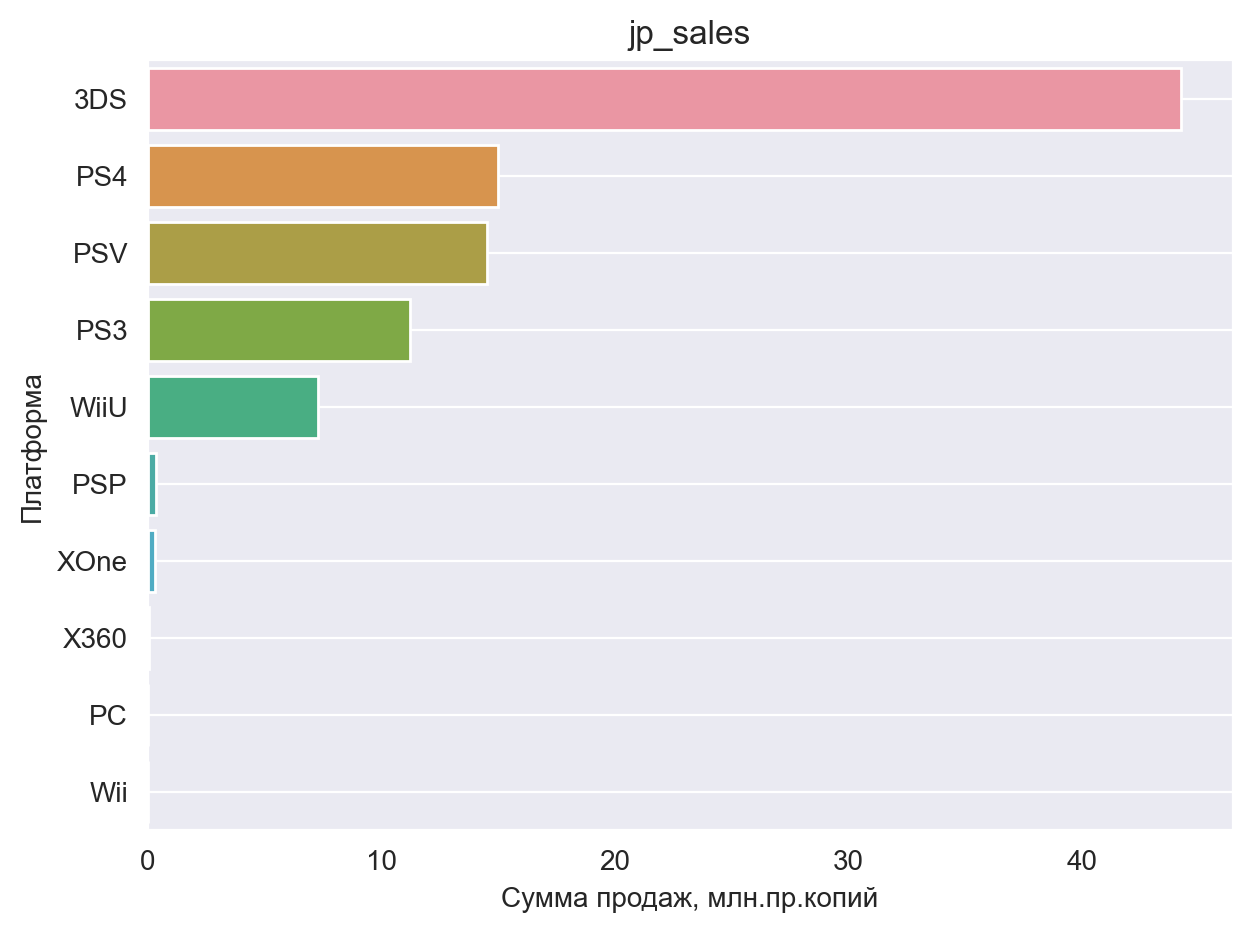

In [51]:
# создание функции для построения графика суммарных продаж в регионах по платформам
def reg_platform_sales(table, list):
    for region in list:
        table = table.sort_values(region, ascending=False)
        sns.barplot(y=table.index, x=table[region])
        plt.grid()
        plt.title(region)
        plt.xlabel('Сумма продаж, млн.пр.копий')
        plt.ylabel('Платформа')
        plt.show();
reg_platform_sales(data_region_platform, ['na_sales', 'eu_sales', 'jp_sales'])

Можно сформировать топ-3 платформ по всех регионах:
- в Северной Америке: PlayStation 4, Xbox One, Xbox 360;
- в Европе: PlayStation 4, Xbox One, PlayStation 3;
- в Японии: Nintendo 3DS, PlayStation 4, PlayStation Vita.

Таким образом, PlayStation 4 вошла в топ по каждому региону, но в Японии предпочтение отдается платформе Nintendo 3DS. 
Наименее популярными для Северной Америки и Европы являются PSP, Nintendo Wii и PlayStation Vita, для Японии же Nintendo Wii, PC и Xbox 360.

In [52]:
# создание сводной таблицы с группировкой суммы продаж в регионах по жанрам
data_region_genre = actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

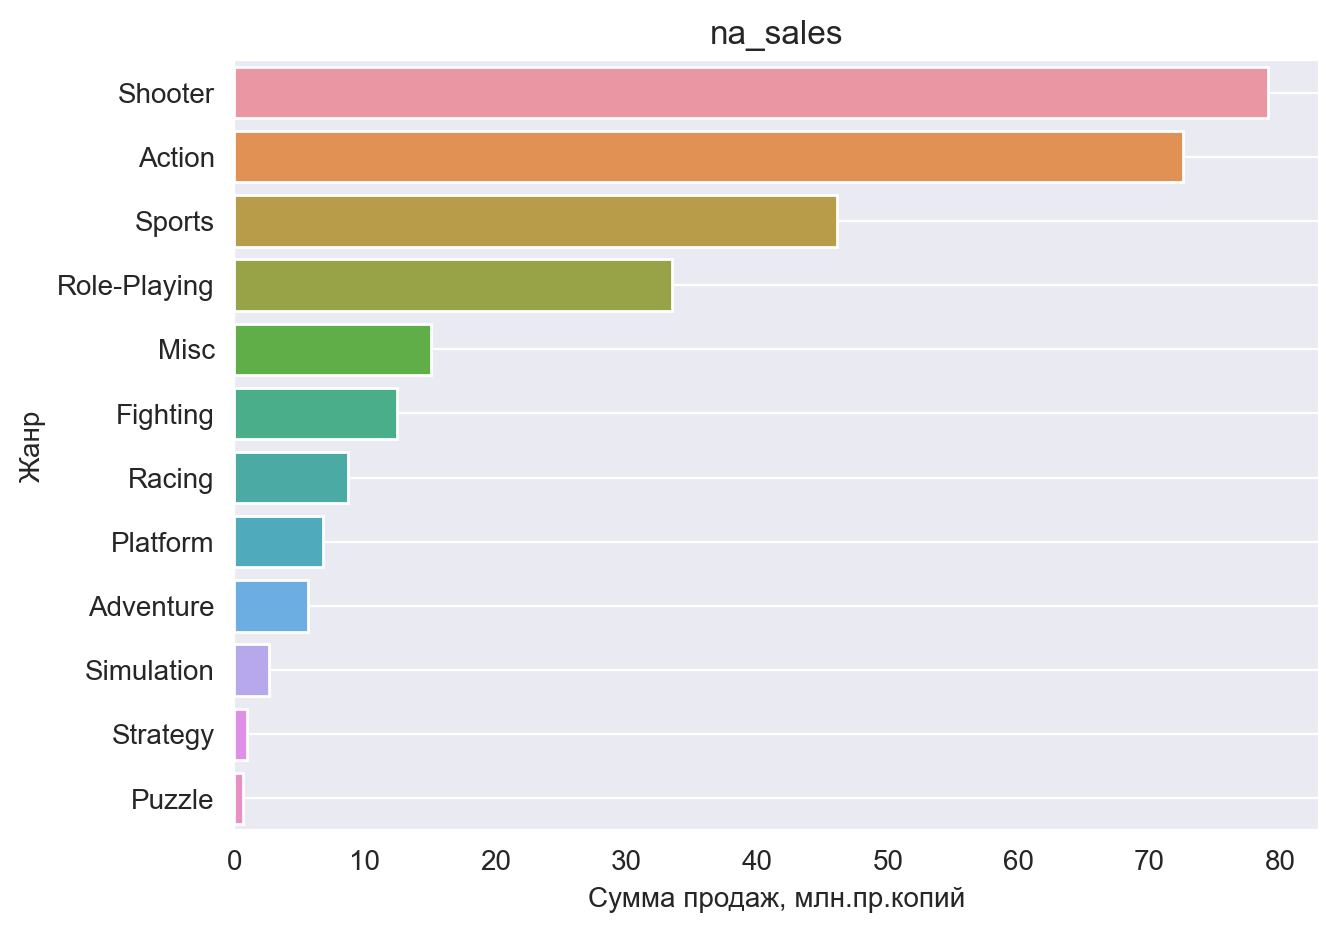

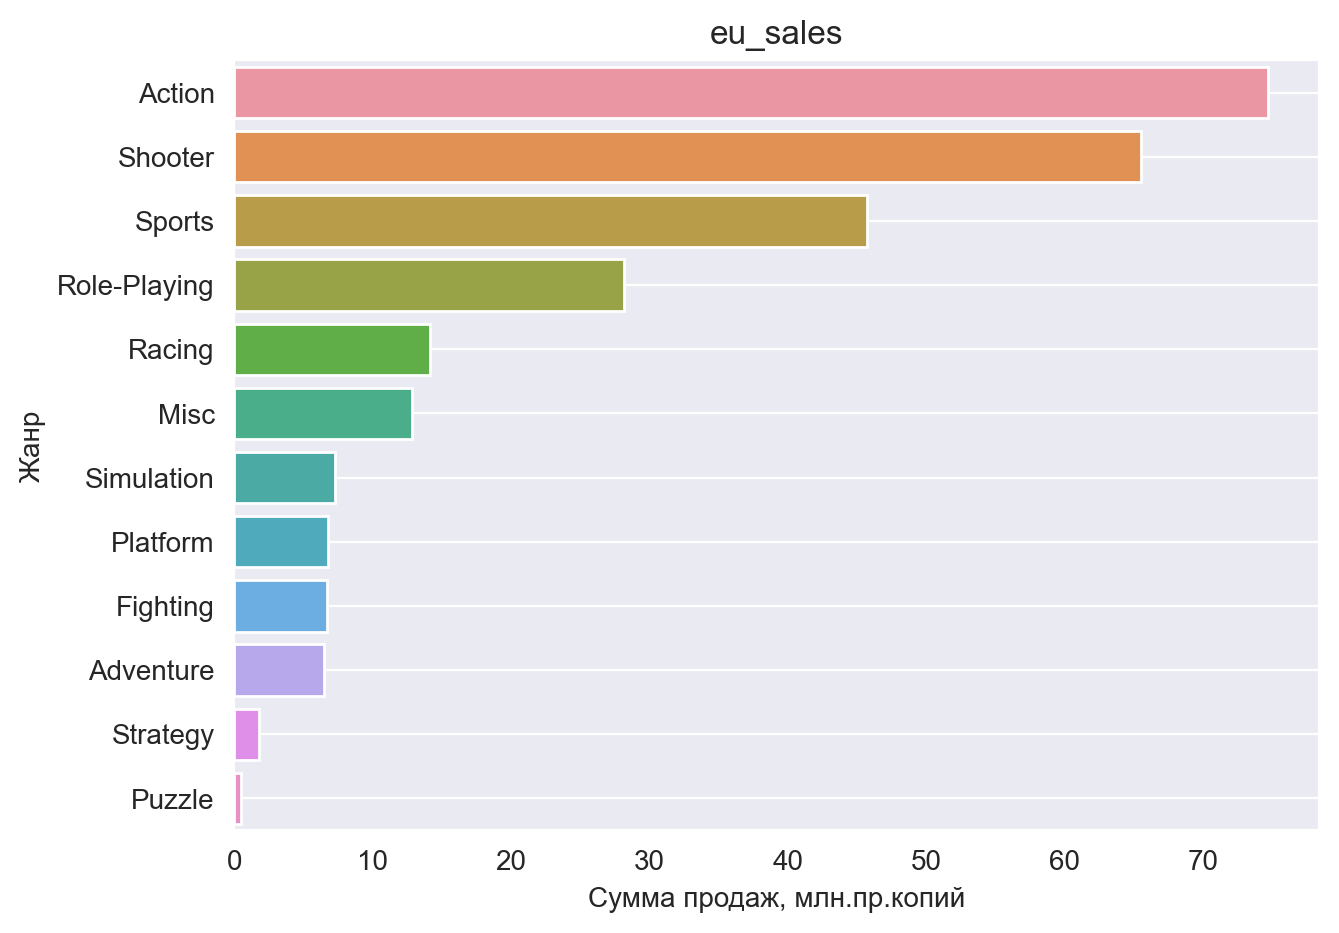

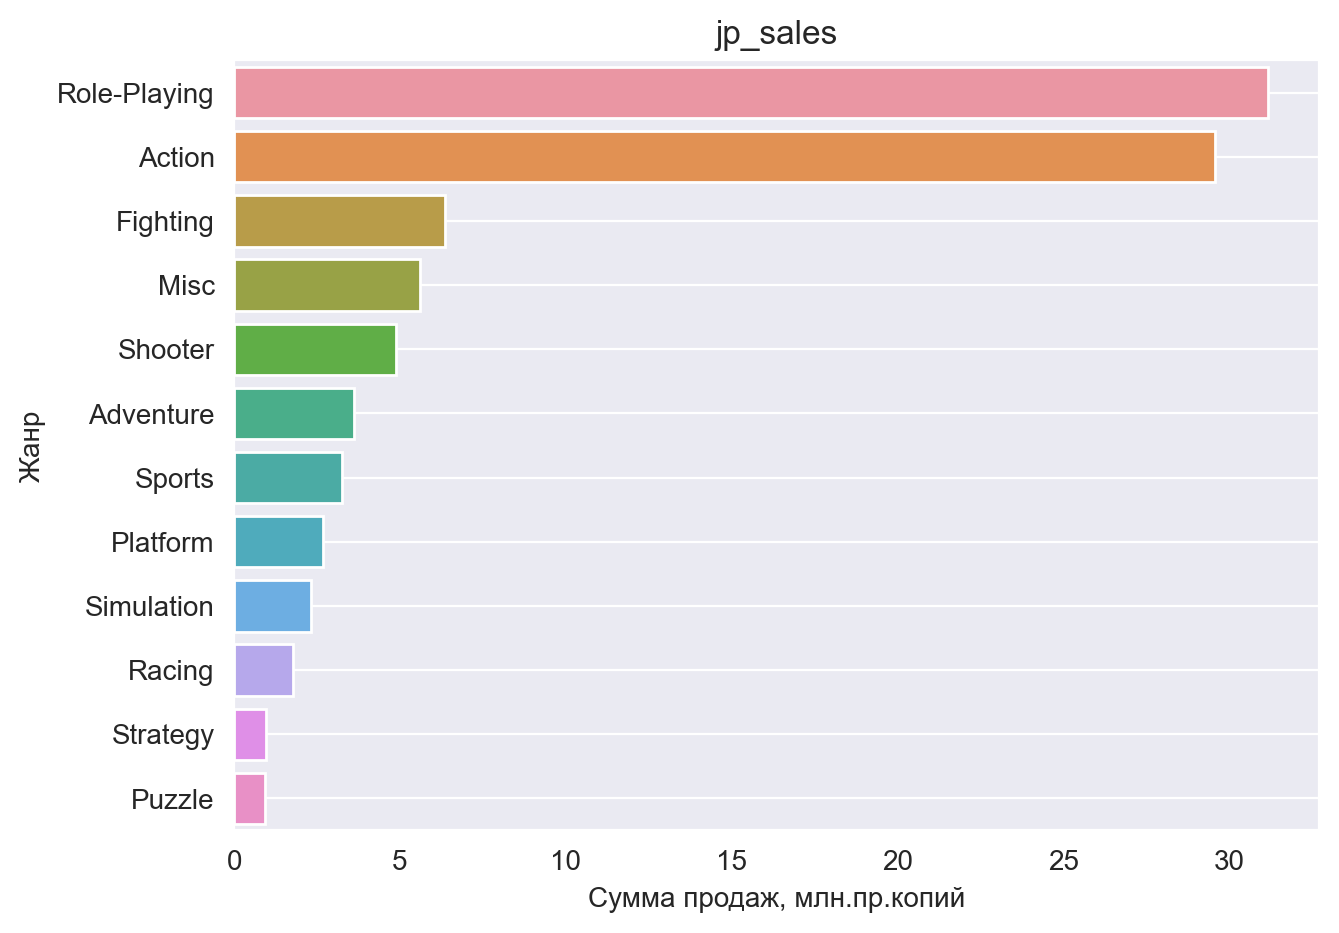

In [53]:
# создание функции для построения графика суммарных продаж в регионах по платформам
def reg_genre_sales(table, list):
    for region in list:
        table = table.sort_values(region, ascending=False)
        sns.barplot(y=table.index, x=table[region])
        plt.grid()
        plt.title(region)
        plt.xlabel('Сумма продаж, млн.пр.копий')
        plt.ylabel('Жанр')
        plt.show();
reg_genre_sales(data_region_genre, ['na_sales', 'eu_sales', 'jp_sales'])

В Северной Америке и Европе наиболее популярными жанрами являются экшн, шутеры и спорт, что говорит о том, что американцы и европейцы имеют схожие предпочтения. В Японии же наиболее популярными жанрами являются RPG, экшн и Fighting.

In [54]:
# создание сводной таблицы с группировкой суммы продаж в регионах по возрастной категории
data_region_esrb = actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

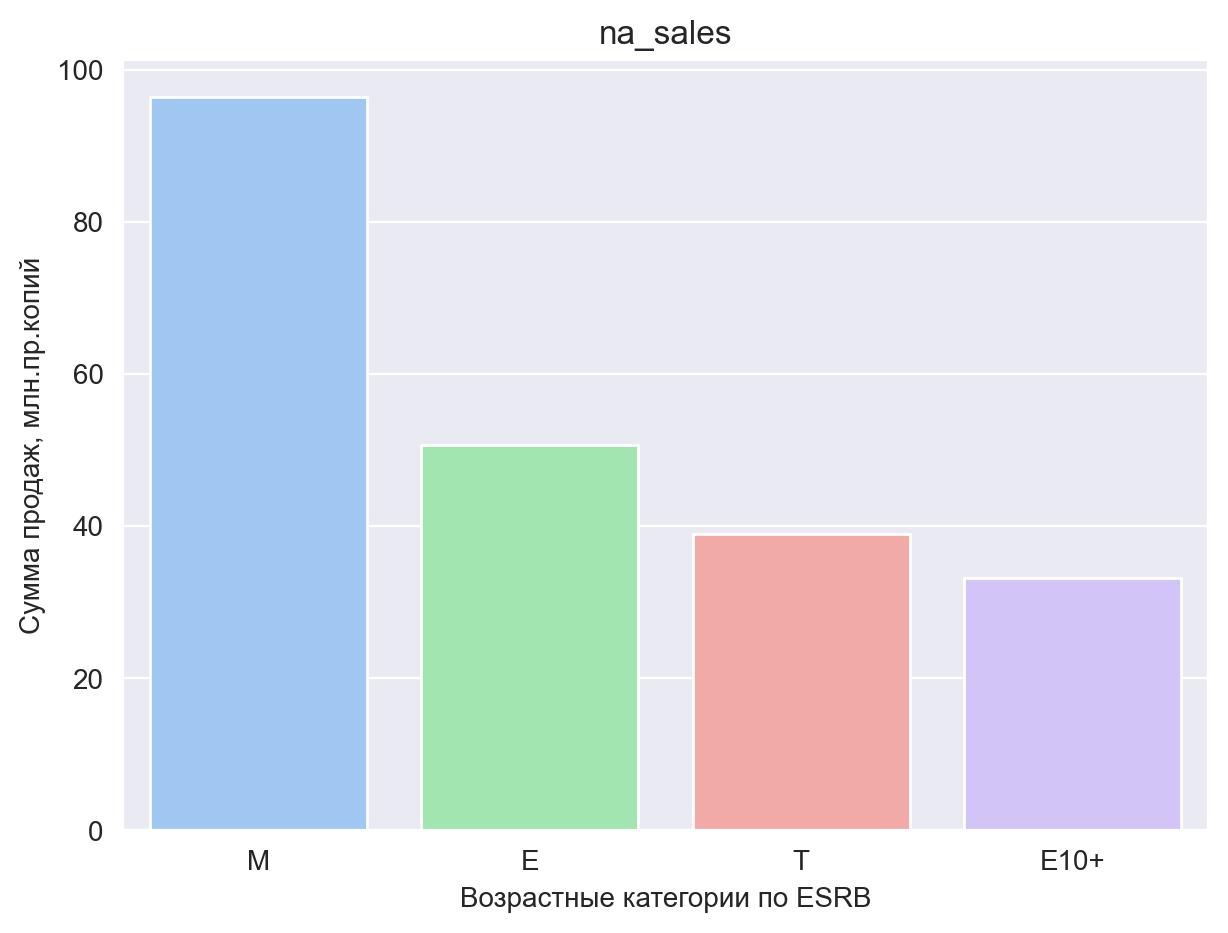

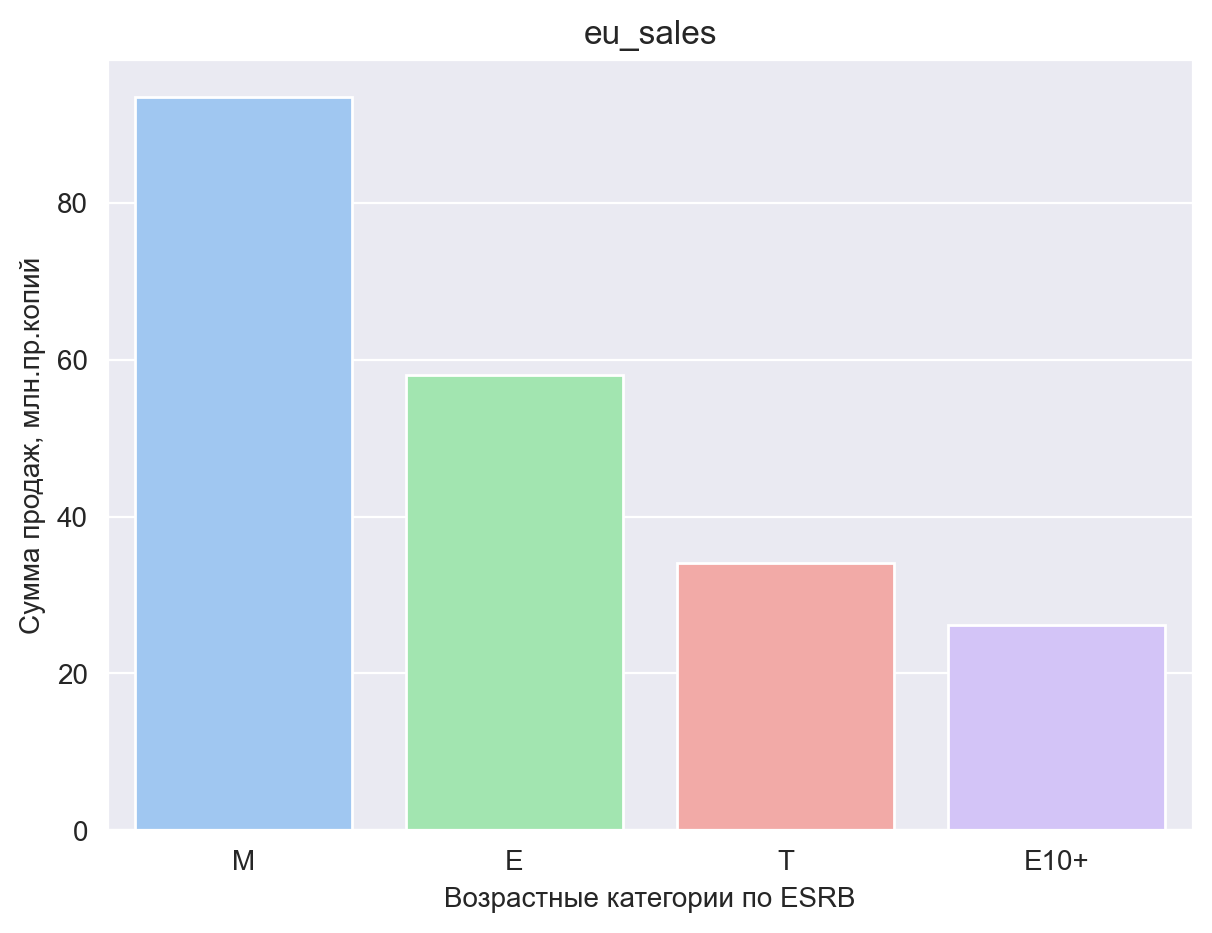

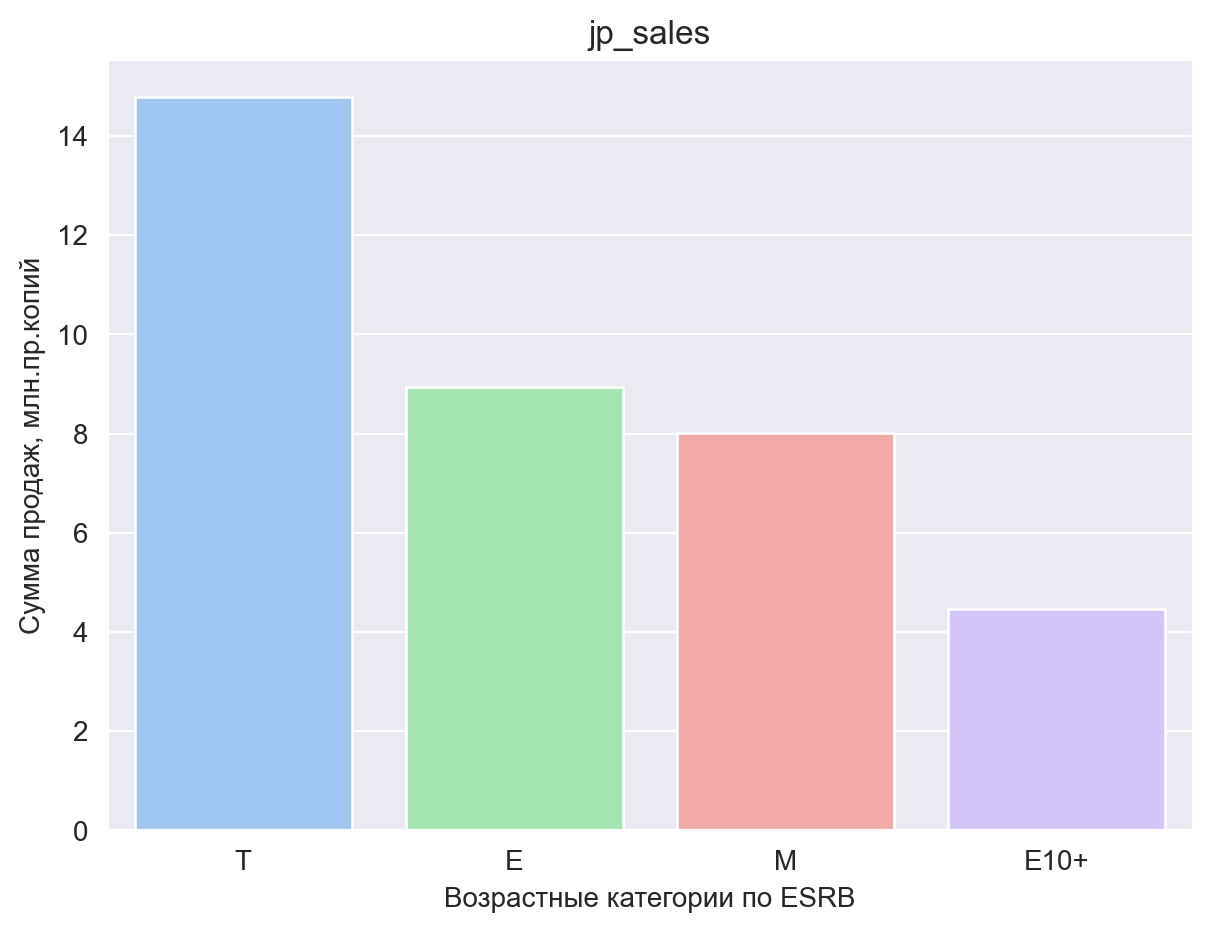

In [55]:
# создание функции для построения графика суммарных продаж в регионах по возрастным категориям
def reg_esrb_sales(table, list):
    for region in list:
        table = table.sort_values(region, ascending=False)
        sns.barplot(x=table.index, y=table[region])
        plt.title(region)
        plt.xlabel('Возрастные категории по ESRB')
        plt.ylabel('Сумма продаж, млн.пр.копий')
        plt.show();
reg_esrb_sales(data_region_esrb, ['na_sales', 'eu_sales', 'jp_sales'])

В Северной Америке и Европе преобладают игры категории "Для взрослых" (т.е. старше 17 лет), что логично, т.к. наиболее популярными являются игры в стиле экшн и шутеры, в которых часто содержатся сцены насилия, ненормативная лексика и т.д.
В Японии же, напротив, лидируют игры в категориях "Для всех" и "Для подростков".

## 5 Проверка гипотез

Далее в работе необходимо проверить следующие гипотезы:

- **Нулевая гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- **Альтернативная гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC разные.


- **Нулевая гипотеза**: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- **Альтернативная гипотеза**: Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевые гипотезы были сформулированы именно таким образом, потому что нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, чтобы все данные лежали в районе изначально предполагаемого значения. Для проверки гипотез на равенство средних двух генеральных совокупностей будет использоваться статистический тест с использованием t-распределения, т.к. выборки независимы.

In [56]:
# создание датафреймов для проверки первой гипотезы
alpha = 0.01
data_xone = actual_data.query('platform == "XOne" and not user_score.isna()')
data_xone = data_xone.loc[:, 'user_score'].reset_index(drop=True)
data_pc = actual_data.query('platform == "PC" and not user_score.isna()')
data_pc = data_pc.loc[:, 'user_score'].reset_index(drop=True)

In [57]:
# расчет среднего рейтинга пользователя для Xbox One
data_xone.mean()

6.594545454545453

In [58]:
# расчет среднего рейтинга пользователя для PC
data_pc.mean()

6.298360655737703

In [59]:
# расчет дисперсии рейтинга пользователя для Xbox One
np.var(data_xone)

1.87954600550964

In [60]:
# расчет дисперсии рейтинга пользователя для PC
np.var(data_pc)

2.877374361730719

In [61]:
# проверка первой нулевой гипотезы
results = st.ttest_ind(data_xone, data_pc, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


По результатам расчета нулевую гипотезу отвергнуть нельзя, соответственно, она остается верной: средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

In [62]:
# создание датафреймов для проверки второй гипотезы
data_action = actual_data.query('genre == "Action" and not user_score.isna()')
data_action = data_action.loc[:, 'user_score'].reset_index(drop=True)
data_sports = actual_data.query('genre == "Sports" and not user_score.isna()')
data_sports = data_sports.loc[:, 'user_score'].reset_index(drop=True)

In [63]:
# расчет среднего рейтинга пользователя для жанра Action
data_action.mean()

6.760606060606054

In [64]:
# расчет среднего рейтинга пользователя для жанра Sports
data_sports.mean()

5.225196850393697

In [65]:
# расчет дисперсии рейтинга пользователя для жанра Action
np.var(data_action)

1.8920844811753907

In [66]:
# расчет дисперсии рейтинга пользователя для жанра Sports
np.var(data_sports)

3.419837559675118

In [67]:
# проверка второй нулевой гипотезы
results = st.ttest_ind(data_action, data_sports, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


По результатам расчета нулевая гипотеза отвергается, соответственно, принимается альтернативная: средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод

В ходе изучения общей информации о датафрейме было обнаружено большое количество пропущенных значений, а также неверные типы данных некоторых столбцов.

Во время предобработки данных пропущенные значения были заполнены в тех столбцах, где это представляется возможным. Строки, наличие которых могло привести к искажению анализа, были удалены. Типы данных были исправлены.

Кроме того, был добавлен дополнительный столбцей с общей суммой продаж по всем регионам для проведения более тщательного анализа.

В ходе исследовательского анализа данных было изучено: количество выпускаемых игр по годам, суммарные продажи по платформам, жизненный цикл платформ, для прогнозирования 2017 года был определен актуальный период с 2014 по 2016 год, изучены суммарные продажи за этот период времени, а также доля каждой платформы в общей сумме, проанализированы влияние отзывов пользователей и критиков на продажи, продажи по игровым жанрам. Кроме того, был составлен портрет пользователя каждого региона, а также проверены несколько гипотез.

По результатам можно сделать ряд выводов:
- несмотря на ежегодный рост (с 1994 года с пиковыми значениями в 2008-2009 г.) количества выпускаемых игр, обусловленный технологическим развитием, появлением новых платформ, с 2012 года выпуск игр значительно снизился в связи с расширением мобильного рынка, а также внедрением социальных сетей в жизнь людей;
- самыми популярными игровыми платформами за весь период являются PlayStation 2, Xbox 360, PlayStation 3, Nintendo Wii, Nintendo DS и PlayStation;
- жизненный цикл платформ, в среднем, составляет 10 лет;
- самыми популярными игровыми платформами за период с 2014 по 2016 год являются PlayStation 4, Xbox One, Nintendo 3DS, PlayStation 3 и Xbox 360;
- растут продажи игр на PlayStation 4, Nintendo 3DS, PC и PlayStation Vita;
- среди топ-5 платформ прослеживается зависимость между оценкой критиков и суммой продаж;
- к наиболее прибыльным жанрам относятся Shooter, Sports, Platform и Fighting;
- в Северной Америке наиболее популярными являются игры на PlayStation 4 в жанре Shooter для лиц старше 17 лет;
- игры на PlayStation 4 в жанре Action возрастной категории "Для взрослых" больше всего пользуются спросом в Европе;
- в Японии же игроки в основном предпочитают игры на Nintendo 3DS в жанре Role-Playing для всех возрастов.

Для прогноза продаж следует брать период с наиболее актуальными данными, который не учитывает устаревшие платформы, нужно делать ставку на наиболее популярные и более современные платформы (т.к. компании будут стремиться перенести своих пользователей на более новые версии), жанры, которые пользуются наибольшим спросом, а также делать акцент на возрастную категорию. 